In [30]:
import tqdm as tqdm
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 속성값 정리 & 데이터 읽기
## train/test 데이터
1. apartment_id : 아파트 아이디
2. city : 도시(서울 특별시, 부산 광역시)
3. dong : 동
4. jibun : 지번
5. apt : 아파트단지 이름
6. addr_kr : 주소
7. exclusive_use_area : 전용면적
8. year_of_completion : 설립일자
9. transaction_year_month : 거래년월
10. transaction_date : 거래날짜
11. floor : 층
12. transaction_real_price : 실거래가

## park 데이터
1. city : 도시이름
2. gu : 구
3. dong : 동
4. park_name : 공원 이름
5. park_type : 공원 종류
6. park_area : 공원 넓이
7. park_exercise_facility : 공원보유 운동시설
8. park_entertrainment_facility : 공원 보유 유희시설
9. park_benefit_facility : 공원보유 편익시설
10. park_cultural_facility : 공원 교양 시설
11. park_facility_other : 공원 보유 기타 시설
12. park_open_year : 개장년도
13. reference_date : 데이터 기준 일자

## day_care_center(어린이집) 데이터
1. city : 도시이름
2. gu : 구
3. day_care_name : 어린이집 이름
4. day_care_type : 어린이집 종류
5. day_care_baby_num : 정원수
6. teacher_num : 보육교직원 수
7. nursing_room_num : 보육실수
8. playground_num : 놀이터수
9. CCTV_num : CCTV 설치수
10. is_commuting_vehicle : 통학차량 운영여부
11. reference_date : 데이터 기준 일자


## 1) 자치구별 경제활동별 지역내총부가가치 및 요소소득 공공데이터 사용
## 2) 부산 경제 활동별 지역 내 총 생산
## 3) 서울시 지역구 데이터
## 4) 부산시 지역구 데이터

In [83]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv(
    "data/test.csv"
)

park = pd.read_csv("data/park.csv")
day_car_center = pd.read_csv("data/day_care_center.csv")

In [84]:
train

transaction_id  apartment_id   city     dong   jibun         apt  \
0                     0          7622  서울특별시      신교동    6-13    신현(101동)   
1                     1          5399  서울특별시      필운동     142      사직파크맨션   
2                     2          3578  서울특별시      필운동   174-1      두레엘리시안   
3                     3         10957  서울특별시      내수동      95       파크팰리스   
4                     4         10639  서울특별시      내수동  110-15        킹스매너   
...                 ...           ...    ...      ...     ...         ...   
1216548         1234823          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216549         1234824          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216550         1234825          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216551         1234826          9586  부산광역시  정관읍 용수리    1364   정관신도시롯데캐슬   
1216552         1234827          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   

                         addr_kr  exclusive_use_area  year_of_completion  \
0              신교동 6-13 신현(101동)             84.8200                2002   
1                 필운동 142 사직파크맨션             99.1700                1973   
2               필운동 174-1 두레엘리시안             84.7400                2007   
3                   내수동 95 파크팰리스            146.3900                2003   
4                내수동 110-15 킹스매너            194.4300                2004   
...                          ...                 ...                 ...   
1216548  정관읍 용수리 1387 정관 동일스위트1차             59.8245                2012   
1216549  정관읍 용수리 1387 정관 동일스위트1차             84.9923                2012   
1216550  정관읍 용수리 1387 정관 동일스위트1차             84.9923                2012   
1216551   정관읍 용수리 1364 정관신도시롯데캐슬            101.7400                2008   
1216552  정관읍 용수리 1387 정관 동일스위트1차             84.9923                2012   

         transaction_year_month transaction_date  floor  \
0                        200801            21~31      2   
1                        200801             1~10      6   
2                        200801             1~10      6   
3                        200801            11~20     15   
4                        200801            21~31      3   
...                         ...              ...    ...   
1216548                  201711            11~20      3   
1216549                  201711            21~30      7   
1216550                  201711            21~30      9   
1216551                  201711            21~30      7   
1216552                  201711            21~30     16   

         transaction_real_price  
0                         37500  
1                         20000  
2                         38500  
3                        118000  
4                        120000  
...                         ...  
1216548                   22000  
1216549                   30750  
1216550                   29500  
1216551                   26700  
1216552                   28800  

[1216553 rows x 13 columns]

## 지역구 정보 가져오기(추가 데이터)
### 1. 훈련데이터, 테스트 데이터의 결측값을 확인하고, shape를 확인해 구조를 파악한다

In [85]:
print(f"훈련 shape : {train.shape}")
print(f"테스트 shape : {test.shape}")

print(f"공원 shape : {park.shape}")
print(f"어린이집 shape : {day_car_center.shape}")

train.isna().sum(axis=1)
test.isna().sum(axis=0)

print()
print("train 데이터 결측값 측정")
print(train.isna().sum())

print()
print("test 데이터 결측값 측정")
print(test.isna().sum())


print()
print(f"park 데이터 결측값 :"
      f"{park.isna().sum()}")




훈련 shape : (1216553, 13)
테스트 shape : (5463, 12)
공원 shape : (1359, 13)
어린이집 shape : (7551, 11)

train 데이터 결측값 측정
transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

test 데이터 결측값 측정
transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
dtype: int64

park 데이터 결측값 :city                              0
gu                                3
dong                              0
park_name             

## 아파트 이름 나누기
1. 아파트 이름을 나누는 이유는 유명 브랜드 (레미안, 자이, 롯데캐슬)는 타 아파트에 비해 가격이 비싸다고 생각한다.
2. 아파트를 나누기전에 훈련 데이터에 "(,), [,]" 기호들이 들어 있기에 불필요한 문자는 삭제해 준다.

In [86]:
from tqdm import tqdm
import re

regex = "\(.*\)|\s-\s.*"
for i in tqdm(range(len(train))):
   train.at[i, 'apt'] = re.sub(regex, '', train.at[i, 'apt'])
for i in tqdm(range(len(test))):
   test.at[i, 'apt'] = re.sub(regex, '', test.at[i, 'apt'])

100%|██████████| 5463/5463 [00:00<00:00, 189372.32it/s]


## 구분자로 나눈 아파트에 이름이 동일 하기 때문에 총합 갯수를 구해준다
1. ex) 파크팰리스(106동) == 파크 팰리스
2. apt 기준으로 train 데이터 기준으로 병합해 준다.
3. test 데이터 동일하게 진행한다.

In [87]:
#train['apt_counts'] = 0
count = train.groupby('apt')['city'].count().reset_index()
count.columns = ["apt", "apt_counts"]

In [88]:
train = train.merge(count, on="apt", how="left")
train

transaction_id  apartment_id   city     dong   jibun         apt  \
0                     0          7622  서울특별시      신교동    6-13          신현   
1                     1          5399  서울특별시      필운동     142      사직파크맨션   
2                     2          3578  서울특별시      필운동   174-1      두레엘리시안   
3                     3         10957  서울특별시      내수동      95       파크팰리스   
4                     4         10639  서울특별시      내수동  110-15        킹스매너   
...                 ...           ...    ...      ...     ...         ...   
1216548         1234823          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216549         1234824          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216550         1234825          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216551         1234826          9586  부산광역시  정관읍 용수리    1364   정관신도시롯데캐슬   
1216552         1234827          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   

                         addr_kr  exclusive_use_area  year_of_completion  \
0              신교동 6-13 신현(101동)             84.8200                2002   
1                 필운동 142 사직파크맨션             99.1700                1973   
2               필운동 174-1 두레엘리시안             84.7400                2007   
3                   내수동 95 파크팰리스            146.3900                2003   
4                내수동 110-15 킹스매너            194.4300                2004   
...                          ...                 ...                 ...   
1216548  정관읍 용수리 1387 정관 동일스위트1차             59.8245                2012   
1216549  정관읍 용수리 1387 정관 동일스위트1차             84.9923                2012   
1216550  정관읍 용수리 1387 정관 동일스위트1차             84.9923                2012   
1216551   정관읍 용수리 1364 정관신도시롯데캐슬            101.7400                2008   
1216552  정관읍 용수리 1387 정관 동일스위트1차             84.9923                2012   

         transaction_year_month transaction_date  floor  \
0                        200801            21~31      2   
1                        200801             1~10      6   
2                        200801             1~10      6   
3                        200801            11~20     15   
4                        200801            21~31      3   
...                         ...              ...    ...   
1216548                  201711            11~20      3   
1216549                  201711            21~30      7   
1216550                  201711            21~30      9   
1216551                  201711            21~30      7   
1216552                  201711            21~30     16   

         transaction_real_price  apt_counts  
0                         37500          13  
1                         20000           1  
2                         38500          13  
3                        118000          55  
4                        120000          15  
...                         ...         ...  
1216548                   22000         837  
1216549                   30750         837  
1216550                   29500         837  
1216551                   26700        1020  
1216552                   28800         837  

[1216553 rows x 14 columns]

In [89]:
count = test.groupby('apt')['city'].count().reset_index()
count.columns = ["apt", "apt_counts"]
test = test.merge(count, on="apt", how="left")
test

transaction_id  apartment_id   city dong   jibun       apt  \
0            1145756         10453  서울특별시   목동     938        청학   
1            1198704           989  부산광역시  초량동  1143-8      고관맨션   
2            1222384          8597  부산광역시  괴정동  447-13      우림그린   
3            1179897         11086  서울특별시  대치동  1007-2   풍림아이원4차   
4            1223091          2121  부산광역시  다대동    1670  다대롯데캐슬블루   
...              ...           ...    ...  ...     ...       ...   
5458         1174640          8965  서울특별시  양재동    15-9       위너스   
5459         1175575          3831  서울특별시  반포동    18-1   래미안퍼스티지   
5460         1157024          5550  서울특별시  구로동   256-1     삼성래미안   
5461         1136863          3371  서울특별시  홍제동   24-16      동양드림   
5462         1218921          6825  부산광역시  재송동    1187    센텀그린타워   

                         addr_kr  exclusive_use_area  year_of_completion  \
0                      목동 938 청학             35.5500                2002   
1                초량동 1143-8 고관맨션             68.7200                1977   
2                괴정동 447-13 우림그린             72.5400                1989   
3     대치동 1007-2 풍림아이원4차(1007-2)            111.5400                2004   
4              다대동 1670 다대롯데캐슬블루            119.6398                2014   
...                          ...                 ...                 ...   
5458                양재동 15-9 위너스             84.0500                2003   
5459            반포동 18-1 래미안퍼스티지             84.9300                2009   
5460             구로동 256-1 삼성래미안            110.1880                2004   
5461              홍제동 24-16 동양드림             92.4400                2005   
5462             재송동 1187 센텀그린타워             84.6400                1993   

      transaction_year_month transaction_date  floor  apt_counts  
0                     201711            11~20      2           1  
1                     201708            21~31      2           1  
2                     201710            11~20      2           1  
3                     201707             1~10     10           2  
4                     201712            11~20     21           3  
...                      ...              ...    ...         ...  
5458                  201710            11~20      7           1  
5459                  201712             1~10      4           2  
5460                  201712            21~31     23          23  
5461                  201710            21~31      1           1  
5462                  201712             1~10      7           1  

[5463 rows x 13 columns]

## 아파트 이름 병합시키기
1. 실제로 서울시에는 다양한 아파트들이 진행한다. 그래서 상위 10개 안에만 있는 아파트 이름을 라벨링을 실시한다.
2. 만약 top10 시공사라면 1이고, 10갱 이외에 시공사면 0을 채워준다.
3. 데이터안에는 다양한 아파트 이름이 있다 그중 25개를 선택해 데이터 라벨링을 실시한다.
4. top10 + list25개 범위가 벗어난다면, "other" 이라는 라벨링을 한다.

In [90]:
# top 10 시공사 아파트 여부를 나타내는 컬럼 생성
train['top10'] = 0
test['top10'] = 0
top10 = ['자이', '푸르지오', '더샵', '롯데캐슬', '이편한|e편한|e-편한',
         '힐스테이트', '아이파크', '래미안', 'sk|SK|에스케이', '데시앙']

train['apt'] = train['apt'].fillna('others')
# top 10 시공사면 1, 아니면 0
for i, brand in enumerate(top10):
    train.loc[train['apt'].str.contains(brand), 'top10'] = 1
    test.loc[test['apt'].str.contains(brand), 'top10'] = 1

In [91]:
# 데이터에 많이 있는 아파트 대표 25개 리스트
apt_names = ['그레이스', '양지', '쌍용', '현대', '한신', '삼성', '대우', '신동아', '두산', '주공',
             '우성', '벽산', '동원로얄듀크','경남', '삼환', '쌍용', '삼익', '대림', '코오롱', '파크리오',
             '엘지', '성원', '잠실', '동궁리치웰', '동성']
# top 10 시공사 키워드와 25개 리스트를 통합
apt_names_list = top10 + apt_names

# `apt_names_list`의 키워드에 해당하는 아파트명이 있는지 여부를 나타내는 새로운 컬럼 생성
train['transformed'] = False
test['transformed'] = False

# `apt_names_list`의 키워드에 아파트명이 포함되면 해당 키워드로 아파트명을 통일함
# 그리고 `transformed` 컬럼값을 True로 변경
for a in tqdm(apt_names_list):
    train.loc[train['apt'].str.contains(a), 'apt'] = a
    test.loc[test['apt'].str.contains(a), 'apt'] = a
    train.loc[train['apt'].str.contains(a), 'transformed'] = True
    test.loc[test['apt'].str.contains(a), 'transformed'] = True

# 아파트 이름이 변경되지 않았을 경우(`transformed=False` 일 경우) 아파트명을 'others'로 변경
for a in tqdm(apt_names):
    train.loc[~train['transformed'], 'apt'] = 'others'
    test.loc[~test['transformed'] , 'apt'] = 'others'

100%|██████████| 25/25 [00:00<00:00, 88.69it/s]


# 아파트 갯수
1. 아파트 고유 갯수를 파악하고
2. 실제로 35개의 데이터가 있는지 파악한다

In [92]:
train['apt'].value_counts()

others          653503
현대               81824
주공               65937
래미안              32743
한신               27481
벽산               26968
우성               24524
롯데캐슬             24053
삼성               20067
sk|SK|에스케이       19709
두산               19501
삼익               18708
푸르지오             18416
쌍용               18256
대림               18194
대우               17786
이편한|e편한|e-편한     14337
신동아              14049
힐스테이트            11985
자이               11719
엘지               10938
경남               10875
코오롱               8602
아이파크              7989
성원                7601
더샵                6977
삼환                6073
동원로얄듀크            6070
파크리오              3094
잠실                2606
동성                2228
데시앙               2222
양지                1033
그레이스               393
동궁리치웰               92
Name: apt, dtype: int64

In [93]:
print(train['apt'].nunique(), test['apt'].nunique())

35 35


## 아파트 라벨링 실시
1. sklearn 데이터 훈련을 하기 위해서는 numeric
2. LabelEncoder를 사용해서 전체를 한번에 변경한다.

In [94]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
label = train['apt']
le.fit(label)
label_encoded = le.transform(label)
train['apt_label'] = label_encoded

In [95]:
le = LabelEncoder()
label = test['apt']
le.fit(label)
label_encoded = le.transform(label)
test['apt_label'] = label_encoded

In [96]:
print(f"apt_label 실시 test : {test['apt_label'].unique()}")
print(f"apt_label 실시 train : {train['apt_label'].unique()}")

apt_label 실시 test : [ 0 13 12 20 33 29 19 28 11 24 16 31  4 25 14 30  1 26 34 18  2 32  9 21
  6 22 15 27 17  5 10 23  7  3  8]
apt_label 실시 train : [ 0 11 20 33  9 15 13 14 19  5 21 34  6  4 31 16 26  1 25 12 29 28 24 32
 18  2  3 22  7 17 23 27  8 30 10]


## city + dong + jibun 나누기
1. 고유값이기에 아파트 이름을 삭제 가능하다.
2. 아파트 이름은 삭제 가능하다.
3. 주소에 소유값은 12,442 축소가 가능하다
4. 대략 12만개 데이터를 12,442개로 라벨 인코딩을 변경 가능

In [97]:
train.shape

(1216553, 17)

In [98]:
train["city/dong"] = train['city'] + train['dong'] + train["jibun"]
test["city/dong"]  = test['city'] + test['dong'] + test["jibun"]
train['city/dong'].unique()

array(['서울특별시신교동6-13', '서울특별시필운동142', '서울특별시필운동174-1', ...,
       '부산광역시기장읍 대라리33-9', '부산광역시기장읍 대라리94-8', '부산광역시기장읍 내리792'],
      dtype=object)

## 면적 & 실거래가 LOG 표준화

1. 로그는 태생적으로 큰 값을 작게 표시되는 고안 방법
2. 즉 측정 단위를 키우는 것만으로는 해결하지 못한 부분을 해결 가능하다.
3. 변수의 측정하는 단위가 매우 작아서 생기는 문제를 해결하고 해석할 수 있다.

In [99]:
#격차가 크기때문에 정규화를 시켜준다
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#
# train["transaction_real_price"] = (train["transaction_real_price"] - train["transaction_real_price"].min()) / (train['transaction_real_price'].max() -train['transaction_real_price'].min())

train['log_price'] = np.log1p(train['transaction_real_price'])
real_price = train['transaction_real_price']
train.drop('transaction_real_price', axis=1, inplace=True)
train.head(1)


transaction_id  apartment_id   city dong jibun     apt            addr_kr  \
0               0          7622  서울특별시  신교동  6-13  others  신교동 6-13 신현(101동)   

   exclusive_use_area  year_of_completion  transaction_year_month  \
0               84.82                2002                  200801   

  transaction_date  floor  apt_counts  top10  transformed  apt_label  \
0            21~31      2          13      0        False          0   

      city/dong  log_price  
0  서울특별시신교동6-13  10.532123

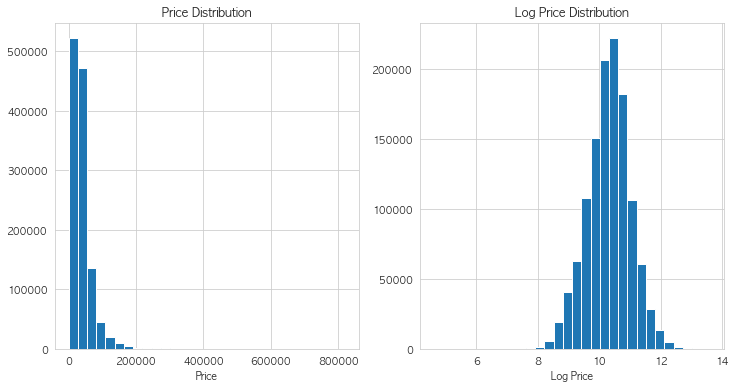

In [100]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(real_price, bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(train['log_price'], bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')

plt.show()

In [101]:
# 면적 로그 변환 후 원래 면적 따로 저장
train['log_area'] = np.log1p(train['exclusive_use_area'])
test['log_area'] = np.log1p(test['exclusive_use_area'])
area = train['exclusive_use_area'] # 원래 가격
train.drop('exclusive_use_area', axis=1, inplace=True)
test.drop('exclusive_use_area', axis=1, inplace=True)
train.head(1)

transaction_id  apartment_id   city dong jibun     apt            addr_kr  \
0               0          7622  서울특별시  신교동  6-13  others  신교동 6-13 신현(101동)   

   year_of_completion  transaction_year_month transaction_date  floor  \
0                2002                  200801            21~31      2   

   apt_counts  top10  transformed  apt_label     city/dong  log_price  \
0          13      0        False          0  서울특별시신교동6-13  10.532123   

   log_area  
0  4.452252

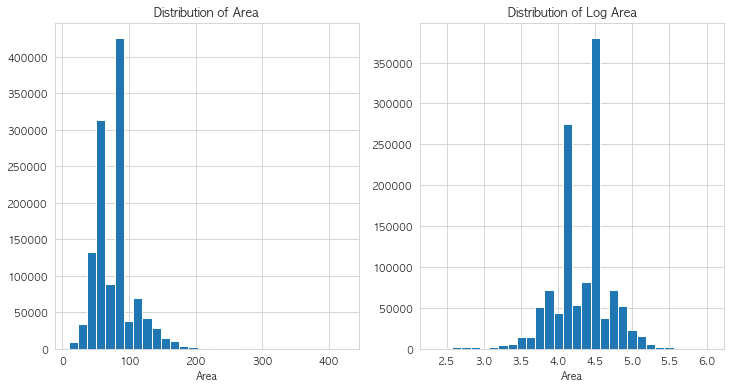

In [102]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(area, bins=30)
ax1.set_title('Distribution of Area')
ax1.set_xlabel('Area')

ax2.hist(train['log_area'], bins=30)
ax2.set_title('Distribution of Log Area')
ax2.set_xlabel('Area')

plt.show()

## 년월일 split 하기
1. 거래 날짜 년 / 월  /일 데이터를 나눠서 각각에 날짜에 대해 시각화를 진행한다.

In [103]:
def split_year_month(df):
    df["transaction_year_month"] = df["transaction_year_month"].astype("str")
    df["year"] = df["transaction_year_month"].str.slice(0, 4)
    df["month"] = df["transaction_year_month"].str.slice(4, 6)
    return df

train = split_year_month(train)
test = split_year_month(test)

## 서울 부산 데이터 나누기
    1. 데이터가 많기에 서울과 부산을 나누어서 생각한다.

In [104]:
def split_seoul_busan(df):
    mask_seoul = (df["city"] == "서울특별시")
    mask_busan = (df["city"] == "부산광역시")
    df_seoul = df.loc[mask_seoul]
    df_busan = df.loc[mask_busan]
    return df_seoul, df_busan


train_seoul, train_busan = split_seoul_busan(train)
test_seoul, test_busan = split_seoul_busan(test)


In [105]:
print(f"훈련 데이터 합계 : {train_seoul.shape[0] + train_busan.shape[0]}")
print(f"테스트 데이터 합계 : {test_seoul.shape[0] + test_busan.shape[0]}")

훈련 데이터 합계 : 1216553
테스트 데이터 합계 : 5463


## 각 자치구 동을 구로 변경 (일단 9만 데이터 삭제)
1. 현재 데이터들에서는 동에대한 정보는 있지만, 구에 대한 정보가 없음
2. 공공데이터 포털에서 서울시 자치구에 대한 데이터와, 부산시 자치구 데이터를 가져온다
3. 같은 동을 찾아서 구를 포함시킨다.

In [106]:
Seoul_data = pd.read_csv('data/Seoul_Data.csv', encoding='cp949')
Busan_data = pd.read_csv("data/Busan_Data.csv", encoding='cp949')

In [107]:
#train_busan.dong == "영주동"
Busan_data['dong']=Busan_data['dong'].astype("str")
Busan_data['dong'] = Busan_data['dong'].str.strip()

In [108]:
def gu_add(dong, gu_info):
    for sr in gu_info.values:
        temp = sr[1] #
        gu = sr[0]
        if(dong == temp) :
            return gu
    return "other"


## 서울 & 부산 구 추가하기
1. 서울시 구를 추가해준다.
2. gu_add 메소드를 사용해서 서울시 자치구 있는 dong은 gu를 반환하고
3. gu에 대한 정복 없으면 other 반환한다

In [109]:
print(train_seoul.shape)
result = train_seoul.apply(lambda sr : gu_add(sr["dong"],Seoul_data),axis=1)
train_seoul['gu']= result

(742285, 20)


/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_3708/442299000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_seoul['gu']= result


In [110]:
print(train_busan.shape)
result = train_busan.apply(lambda sr : gu_add(sr['dong'], Busan_data), axis=1)
train_busan['gu'] = result

(474268, 20)


/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_3708/825939355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_busan['gu'] = result


In [111]:
print(f"훈련 서울 데이터 : {train_seoul['gu'].unique()}")
print(f"훈련 부산 데이터 : {train_busan['gu'].unique()}")

훈련 서울 데이터 : ['종로구' '동대문구' '중구' '성동구' '용산구' '광진구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '마포구'
 '은평구' '강남구' '서대문구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '송파구'
 '강동구']
훈련 부산 데이터 : ['중구' '서구' '동구' '영도구' '부산진구' '동래구' '남구' '북구' '해운대구' '사하구' '금정구' '강서구'
 '연제구' '수영구' '사상구' '기장군']


In [112]:
result = test_busan.apply(lambda sr : gu_add(sr['dong'], Busan_data), axis=1)
test_busan['gu'] = result

result = test_seoul.apply(lambda sr : gu_add(sr['dong'], Seoul_data), axis=1)
test_seoul['gu'] = result

/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_3708/1118661065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_busan['gu'] = result
/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_3708/1118661065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_seoul['gu'] = result


In [113]:
print(f"테스트 서울 데이터 : {test_seoul['gu'].unique()}")
print(f"테스트 부산 데이터 : {test_busan['gu'].unique()}")

테스트 서울 데이터 : ['양천구' '강남구' '강서구' '강동구' '마포구' '송파구' '성동구' '영등포구' '구로구' '용산구' '노원구' '은평구'
 '성북구' '관악구' '서초구' '서대문구' '중랑구' '중구' '광진구' '도봉구' '금천구' '동작구' '동대문구' '종로구'
 '강북구']
테스트 부산 데이터 : ['동구' '사하구' '부산진구' '사상구' '북구' '해운대구' '영도구' '기장군' '남구' '수영구' '금정구' '연제구'
 '동래구' '서구' '강서구' '중구']


## 데이터 병합에 많은 시간 소요됨으로 데이터 저장하기
1. 12만개 데이터를 합치기에 많은 시간이 소요된다.
2. csv를 미리 저장하고 시간을 단축한다.

In [2]:
train_seoul.to_csv("SaveData/train_seoul.csv", index=False)
train_busan.to_csv("SaveData/train_busan.csv", index=False)

test_seoul.to_csv('SaveData/test_seoul.csv', index=False)
test_busan.to_csv('SaveData/test_busan.csv', index=False)

NameError: name 'train_seoul' is not defined

In [3]:
import pandas as pd

train_seoul = pd.read_csv("SaveData/train_seoul.csv")

In [4]:
train_seoul['gu'].unique()

array(['종로구', '동대문구', '중구', '성동구', '용산구', '광진구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '마포구', '은평구', '강남구', '서대문구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '송파구', '강동구'], dtype=object)

# gu & dong라벨 인코딩
1. 아파트에 집값은 자치구에 많은 영향을 끼친다.
2. 데이터들을 분석하기 위해 인코딩 형식 해야한다.

In [212]:
train_seoul = pd.read_csv("SaveData/train_seoul.csv")
train_busan = pd.read_csv("SaveData/train_busan.csv")
test_seoul = pd.read_csv("SaveData/test_seoul.csv")
test_busan = pd.read_csv("SaveData/test_busan.csv")


In [213]:
from sklearn.preprocessing import LabelEncoder


def LabelEncoding(df, labeling):
    name = None
    le = LabelEncoder()
    label = df[labeling]
    le.fit(label)
    label_encoded = le.transform(label)
    if labeling == "gu":
        name = "gu_label"
    elif labeling == "dong":
        name = "dong_label"
    df[name] = label_encoded
    return df


train_seoul = LabelEncoding(train_seoul, 'gu')
train_seoul = LabelEncoding(train_seoul, 'dong')
test_seoul = LabelEncoding(test_seoul, "gu")
test_seoul = LabelEncoding(test_seoul, "dong")


train_busan = LabelEncoding(train_busan, 'gu')
train_busan = LabelEncoding(train_busan, 'dong')
test_busan = LabelEncoding(test_busan, "gu")
test_busan = LabelEncoding(test_busan, "dong")


In [214]:
print(train_busan.shape[0] +train_seoul.shape[0])

1216553


## 라벨 인코딩한 결과 저장하기

In [215]:
train_seoul.to_csv("SaveData/train_seoul.csv", index=False)
train_busan.to_csv("SaveData/train_busan.csv", index=False)

test_seoul.to_csv('SaveData/test_seoul.csv', index=False)
test_busan.to_csv('SaveData/test_busan.csv', index=False)

# 2.Feature Engineering and Variable Selection
1. target을 맞추기 위해  필요한 특성들을 추출한다

# 2-1 boxplot 으로 이상치값을 판단한다.

AxesSubplot(0.125,0.125;0.775x0.755)
이상치 보다 높은 갯수 : 691602
이상치 보다 낮은 갯수 : 510


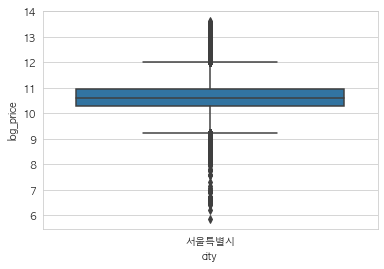

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print(sns.boxplot(data=train_seoul, x="city", y="log_price"))
print(f"이상치 보다 높은 갯수 : {train_seoul.loc[train_seoul.log_price < 11.5].shape[0]}")
print(f"이상치 보다 낮은 갯수 : {train_seoul.loc[train_seoul.log_price < 9].shape[0]}")

AxesSubplot(0.125,0.125;0.775x0.755)
이상치 보다 높은 갯수 : 473143
이상치 보다 낮은 갯수 : 787


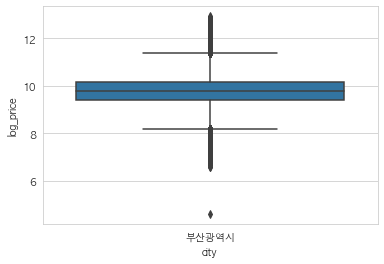

In [217]:
print(sns.boxplot(data=train_busan, x="city", y="log_price"))
print(f"이상치 보다 높은 갯수 : {train_busan.loc[train_busan.log_price < 11.5].shape[0]}")
print(f"이상치 보다 낮은 갯수 : {train_busan.loc[train_busan.log_price < 8].shape[0]}")

# 2-1 도출 결과
1. 집값 매년 변화하기 때문에 평균 값을 측정하기 힘들다.

# 2-2 월에 따른 집값을 시각화한다
1. 화폐 가치와 주변 집값이 매년 변화기 때문에 시각화해 상관계수를 파악한다.
2. x는 월, y는 price 집값이다.

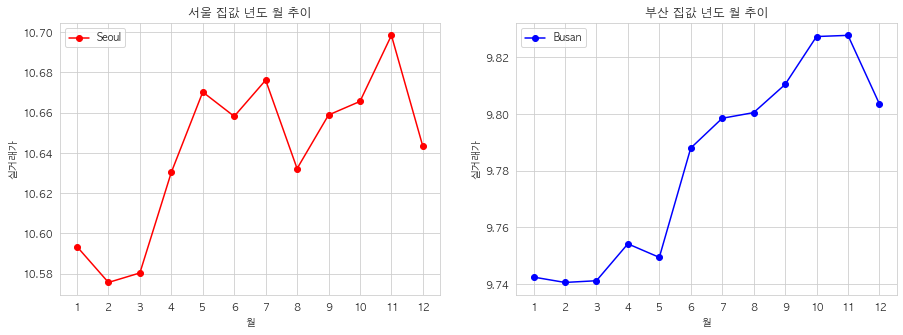

In [218]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
month_seoul_mean = train_seoul.groupby("month").mean()["log_price"]

plt.plot(month_seoul_mean, marker="o", color="r", label="Seoul")
plt.xlabel("월")
plt.ylabel("실거래가")
plt.xticks(np.arange(1,13))
plt.title("서울 집값 년도 월 추이")
plt.legend()


plt.subplot(1,2,2)
month_busan_mean =train_busan.groupby('month').mean()["log_price"]
plt.plot(month_busan_mean, marker="o", color="b", label="Busan")
plt.xlabel("월")
plt.ylabel("실거래가")
plt.xticks(np.arange(1,13))
plt.title("부산 집값 년도 월 추이")
plt.legend()
plt.legend()

plt.show()

## 2-2-1 도출 결과 (동)
1. 물량이 많은 2 ~3 가격이 떨어진다.
2. 거래 날짜가 많이 없는 9 ~ 12월에는 가격이 올리간다.
3. 물량에 따라 가격이 많이 움직인다.

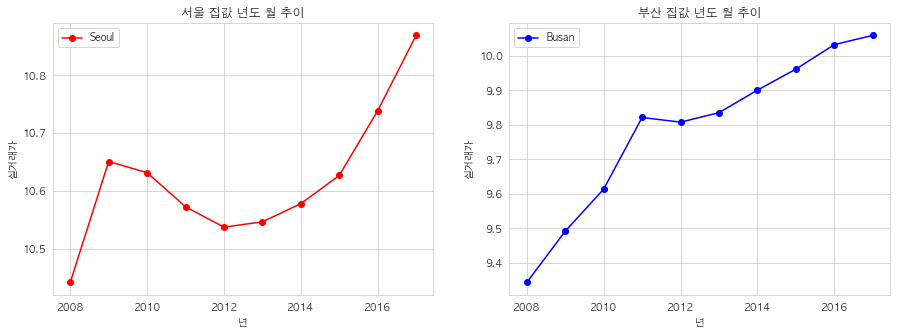

In [219]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
month_seoul_mean = train_seoul.groupby("year").mean()["log_price"]

plt.plot(month_seoul_mean, marker="o", color="r", label="Seoul")
plt.xlabel("년")
plt.ylabel("실거래가")
plt.title("서울 집값 년도 월 추이")
plt.legend()


plt.subplot(1,2,2)
month_busan_mean =train_busan.groupby('year').mean()["log_price"]
plt.plot(month_busan_mean, marker="o", color="b", label="Busan")
plt.xlabel("년")
plt.ylabel("실거래가")
plt.title("부산 집값 년도 월 추이")
plt.legend()
plt.legend()

plt.show()

# 2-2-2 도출 결과 (구)
1. 경제에 대한 영향을 많이 받는다.
2. 2008년에는 금융 위기로 집값이 많이 내려갔지만
3. 시간이 지날 수록 회복 한다.

# 2-3 서울 & 부산 자치구, 동 대한 corr 계수를 파악한다

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'preseason')

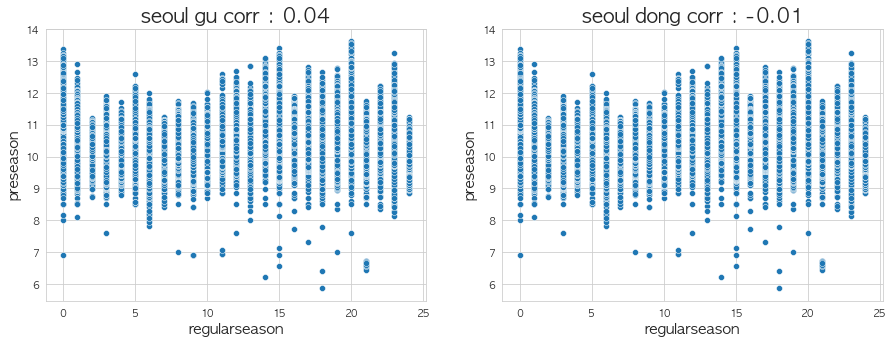

In [220]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
corr = train_seoul['gu_label'].corr(train_seoul['log_price'])
sns.scatterplot(train_seoul['gu_label'], train_seoul['log_price'])
plt.title("seoul gu corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)


plt.subplot(1,2,2)
corr = train_seoul['dong_label'].corr(train_seoul['log_price'])
sns.scatterplot(train_seoul['gu_label'], train_seoul['log_price'])
plt.title("seoul dong corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'preseason')

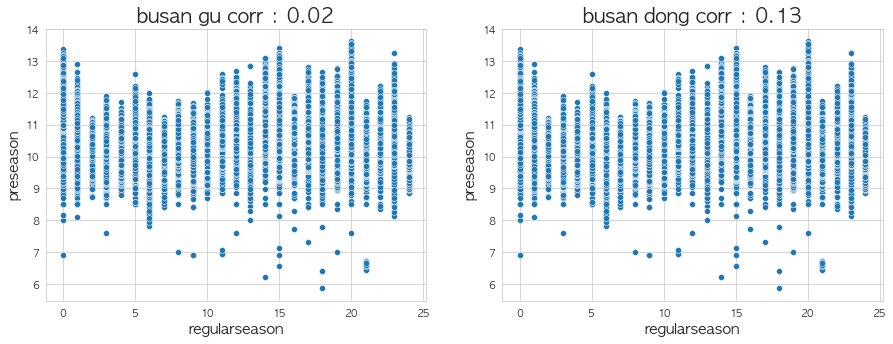

In [221]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
corr = train_busan['gu_label'].corr(train_busan['log_price'])
sns.scatterplot(train_seoul['gu_label'], train_seoul['log_price'])
plt.title("busan gu corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)


plt.subplot(1,2,2)
corr = train_busan['dong_label'].corr(train_busan['log_price'])
sns.scatterplot(train_seoul['gu_label'], train_seoul['log_price'])
plt.title("busan dong corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

# 2-3 도출 결과
1. 사람이 인식하기에 구와 동은 큰 관련이 있다고 생각한다.
2. 실제로는 자치구에 비례하는 편의시설, 교육 등 다수와 관련을 지어야 corr 계수를 정확하게 파악 할 수 있다.

# 2-4 서울 & 부산 구에 대한 갯수를 체크한다.
1. 자치구 갯수를 파악해 일정한 갯수가 있는지 파악한다.

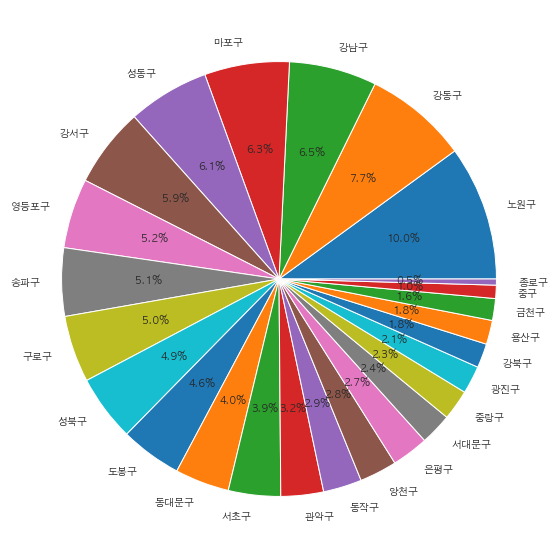

In [222]:
import matplotlib.pyplot as plt



gu_count = train_seoul['gu'].value_counts()
# ClassContValue = list(gu_count.values)
# ClassCountName = list(gu_count.index)

plt.figure(figsize=(15,10))

plt.pie(list(gu_count.values), labels=list(gu_count.index), autopct="%.1f%%")
plt.show()

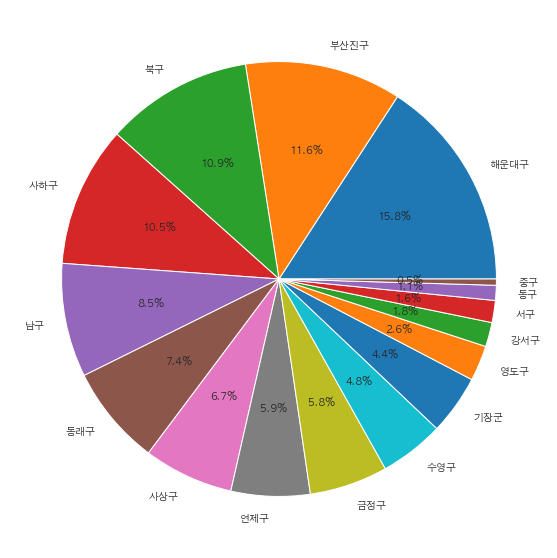

In [223]:
import matplotlib.pyplot as plt



gu_count = train_busan['gu'].value_counts()
# ClassContValue = list(gu_count.values)
# ClassCountName = list(gu_count.index)

plt.figure(figsize=(15,10))

plt.pie(list(gu_count.values), labels=list(gu_count.index), autopct="%.1f%%")
plt.show()

# 2-4 도출 결과
1. 서울은 노원구 > 강동구 > 강남구 순으로 거래가 이루어졌다.
2. 부산은 해운대구 > 부산진구 > 북구 순으로 거래가 이루어진다.
3. 결국 상위 3개를 분석해본 결과 해당 지역들은 집값이 싸거나, 교육 인프라가 구비된 곳이 많으 거래가 일어난다.

# 2-5 자치구에 대한 거래날짜을 시각화 한다.
### 2-5-1 서울 거래날짜 시각화

In [224]:
year_gu = train_seoul.groupby(["gu","year"])['log_price'].mean()
year_gu = year_gu.reset_index()
year_gu = year_gu.set_index("year")
gu_name = year_gu.reset_index()['gu'].unique()

def gu_linePlot(year_gu, gu_name):
    gu_info_name = {}
    for name in gu_name:
        gu_info = year_gu.loc[year_gu['gu'] == name]
        gu_info = gu_info.drop("gu", axis=1)
        gu_info_name[name] = gu_info
    return gu_info_name

gu_list = gu_linePlot(year_gu, gu_name)

/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_1117/2116834593.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


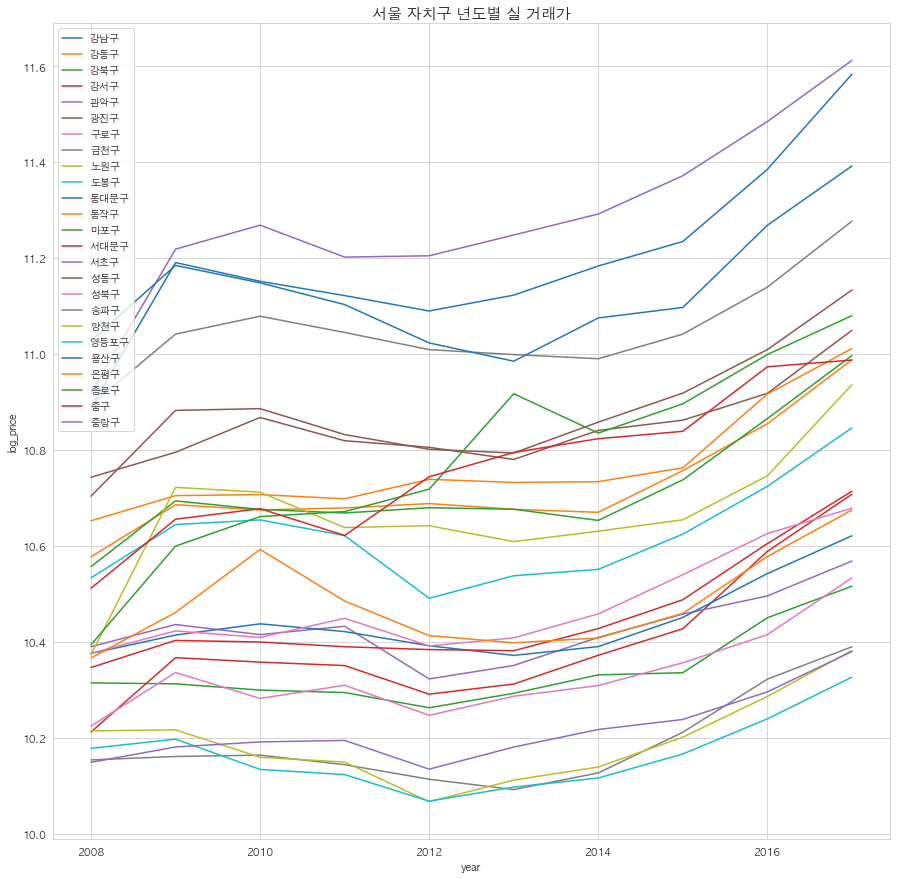

In [225]:
import seaborn as sns
for name, data in gu_list.items():
    ax = sns.lineplot(data= data, x='year', y='log_price', label=name)

ax.set_title("서울 자치구 년도별 실 거래가", size=15)
ax.figure.set_size_inches(15,15)
ax.legend(loc="upper left")
ax.figure.show()

# 도출 결과  2-5-1
1. 서초구/ 강남구 / 용산구 순으로 높은 가격대를 유지하고 있다.2
2. 2008년에는 가격이 다소 낮지만 시간이 지날 수 록 모든 자치구에 거래 가격이 올라가고 있다.

## 2-5-2
### 부산 자치구 거래 날짜 년도별 시각화

In [226]:
year_gu = train_busan.groupby(["gu","year"])['log_price'].mean()
year_gu = year_gu.reset_index()
year_gu = year_gu.set_index("year")
gu_name = year_gu.reset_index()['gu'].unique()

def gu_linePlot(year_gu, gu_name):
    gu_info_name = {}
    for name in gu_name:
        gu_info = year_gu.loc[year_gu['gu'] == name]
        gu_info = gu_info.drop("gu", axis=1)
        gu_info_name[name] = gu_info
    return gu_info_name


gu_list = gu_linePlot(year_gu, gu_name)

/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_1117/3650840325.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


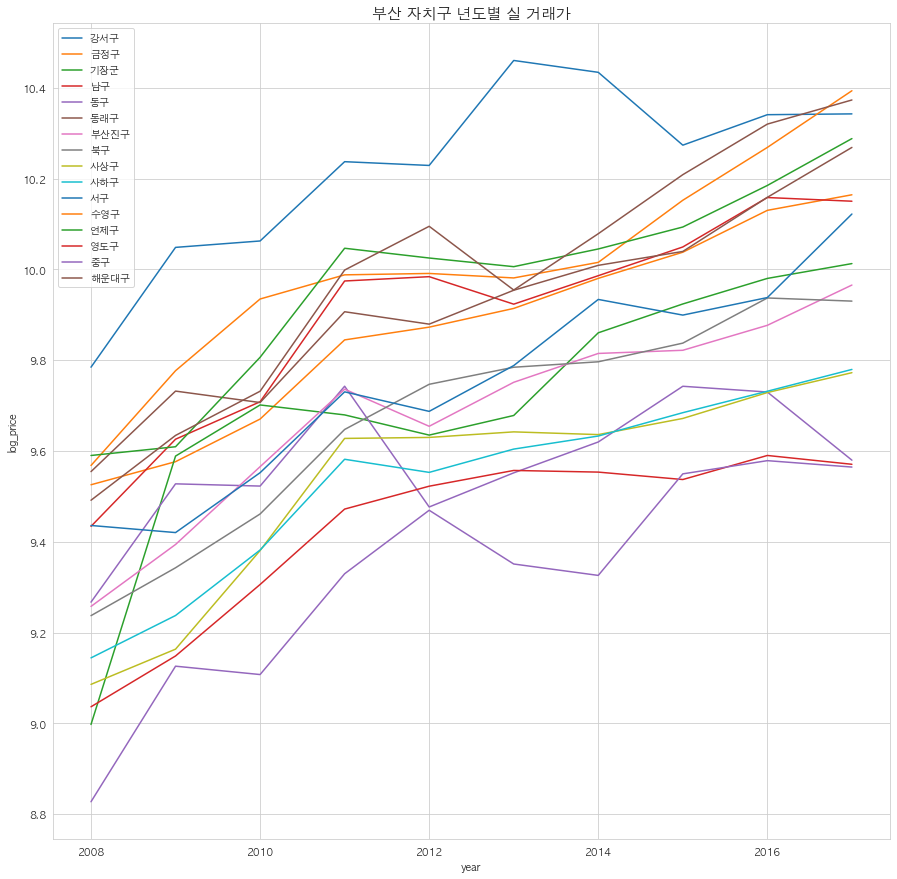

In [227]:
import seaborn as sns
for name, data in gu_list.items():
    ax = sns.lineplot(data= data, x='year', y='log_price', label=name)

ax.figure.set_size_inches(15,15)
ax.set_title("부산 자치구 년도별 실 거래가", size=15)
ax.legend(loc="upper left")
ax.figure.show()

# 도출 결과 2-5-2
1. 서울과 비슷하지만, 다소 내려가는 것을 볼 수 있다
2. 인구가 점점 빠지면서 비 수도권에서는 가격에 추이가 급등하는 그래프는 아니다

# 2-6 주소 인코딩
## 1. 주소는 고유한 값이기 때문에 해당 아파트의 실제 주소를 구해 라벨링을 시켜줘야 한다.

In [228]:
test_seoul

transaction_id  apartment_id   city dong   jibun     apt  \
0            1145756         10453  서울특별시   목동     938  others   
1            1179897         11086  서울특별시  대치동  1007-2  others   
2            1151450          9179  서울특별시  염창동   254-2  others   
3            1197195          4018  서울특별시  암사동   414-2    롯데캐슬   
4            1146078          4397  서울특별시  신정동     311  others   
...              ...           ...    ...  ...     ...     ...   
3906         1131346         12202  서울특별시  하계동     270      현대   
3907         1174640          8965  서울특별시  양재동    15-9  others   
3908         1175575          3831  서울특별시  반포동    18-1     래미안   
3909         1157024          5550  서울특별시  구로동   256-1     래미안   
3910         1136863          3371  서울특별시  홍제동   24-16  others   

                         addr_kr  year_of_completion  transaction_year_month  \
0                      목동 938 청학                2002                  201711   
1     대치동 1007-2 풍림아이원4차(1007-2)                2004                  201707   
2               염창동 254-2 이너스내안에                2004                  201711   
3              암사동 414-2 롯데캐슬퍼스트                2008                  201712   
4               신정동 311 목동신시가지10                1987                  201712   
...                          ...                 ...                     ...   
3906                  하계동 270 현대                1988                  201712   
3907                양재동 15-9 위너스                2003                  201710   
3908            반포동 18-1 래미안퍼스티지                2009                  201712   
3909             구로동 256-1 삼성래미안                2004                  201712   
3910              홍제동 24-16 동양드림                2005                  201710   

     transaction_date  ...  top10  transformed  apt_label       city/dong  \
0               11~20  ...      0        False          0      서울특별시목동938   
1                1~10  ...      0        False          0  서울특별시대치동1007-2   
2                1~10  ...      0        False          0   서울특별시염창동254-2   
3               21~31  ...      1         True         13   서울특별시암사동414-2   
4               11~20  ...      0        False          0     서울특별시신정동311   
...               ...  ...    ...          ...        ...             ...   
3906            11~20  ...      0         True         33     서울특별시하계동270   
3907            11~20  ...      0        False          0    서울특별시양재동15-9   
3908             1~10  ...      1         True         12    서울특별시반포동18-1   
3909            21~31  ...      1         True         12   서울특별시구로동256-1   
3910            21~31  ...      0        False          0   서울특별시홍제동24-16   

      log_area  year  month    gu  gu_label dong_label  
0     3.598681  2017     11   양천구        18         77  
1     4.723309  2017      7   강남구         0         49  
2     4.453300  2017     11   강서구         3        173  
3     4.638025  2017     12   강동구         1        160  
4     4.673389  2017     12   마포구        12        152  
...        ...   ...    ...   ...       ...        ...  
3906  4.286066  2017     12   노원구         8        242  
3907  4.443239  2017     10   서초구        14        162  
3908  4.453533  2017     12   서초구        14         88  
3909  4.711222  2017     12   구로구         6         16  
3910  4.537320  2017     10  서대문구        13        258  

[3911 rows x 22 columns]

In [229]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
label = train_seoul['city/dong']
le.fit(label)
label_encoded = le.transform(label)
train_seoul['city/dong_label'] = label_encoded

In [230]:
le = LabelEncoder()
label = test_seoul['city/dong']
le.fit(label)
label_encoded = le.transform(label)
test_seoul['city/dong_label'] = label_encoded

In [231]:
le = LabelEncoder()
label = test_busan['city/dong']
le.fit(label)
label_encoded = le.transform(label)
test_busan['city/dong_label'] = label_encoded

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


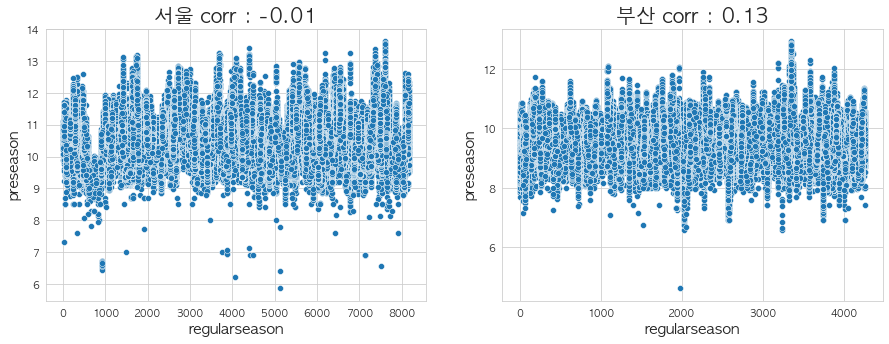

In [232]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

corr = train_seoul['city/dong_label'].corr(train_seoul['log_price'])
sns.scatterplot(train_seoul['city/dong_label'], train_seoul['log_price'])
plt.title("서울 corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

plt.subplot(1,2,2)
le = LabelEncoder()
label = train_busan['city/dong']
le.fit(label)
label_encoded = le.transform(label)
train_busan['city/dong_label'] = label_encoded
corr = train_busan['city/dong_label'].corr(train_busan['log_price'])
sns.scatterplot(train_busan['city/dong_label'], train_busan['log_price'])
plt.title("부산 corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)
plt.show()

# 도출 결과 2-6
1. 서울은 해당 주소에 편차가 매우 크기때문에 유의미한 상관계수를 찾기 힘들지만,
2. 부산은 편차가 작고 이상치 값이 많이 없기 때문에 0.13 이라는 상관계수를 파악할 수 있다.

# 2-7 서울 부산 실거래가 시각화

In [ ]:
import pandas as pd
import numpy as np
import folium
import requests
import json
import re

df=pd.read_csv('SaveData/train_seoul.csv')
#df.columns = df.columns.map(str)


# 서울 행정구역 json raw파일(githubcontent)https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json
s_geo='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
bin=list(df['log_price']. quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
s_map = folium.Map(location=[37.559984,126.9753071],  # 숭례문 위도, 경도
                   tiles='Stamen Terrain', zoom_start=10)
# scale = [-0.1, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1.1]
scale = [4,
         6,
         8, 8.2, 8.4, 8.6, 8.8,
         9, 9.2, 9.4, 9.6, 9.8,
         10, 10.2, 10.4, 10.6, 10.8,
         11, 11.2, 11.4, 11.6, 11.8,
         12, 12.2, 12.4, 12.6, 12.8,
         13, 13.2, 13.4, 13.6, 13.8,
         14,
         16,
         18]
folium.Choropleth(
    geo_data=s_geo,
    data=df,
    columns=['gu','log_price'],
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
    threshold_scale=scale,
    key_on='feature.properties.name'
 ).add_to(s_map)


s_map

In [ ]:
import pandas as pd
import numpy as np
import folium

df=pd.read_csv('SaveData/train_busan.csv')
#df.columns = df.columns.map(str)


print(df.head())
import requests
import json
import re

# 서울 행정구역 json raw파일(githubcontent)https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json
s_geo='./부산_행정경계.json'
bin=list(df['log_price']. quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
s_map = folium.Map(location=[35.1795543,129.0756416],  # 숭례문 위도, 경도
                   tiles='Stamen Terrain', zoom_start=10)
# scale = [-0.1, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 1.1]
scale = [6,
         7,
         8, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9,
         9, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9,
         10, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
         11, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
         12, #12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9,
         13,
         14]
folium.Choropleth(
    geo_data=s_geo,
    data=df,
    columns=['gu','log_price'],
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
    threshold_scale=scale,
    key_on='feature.properties.구'
 ).add_to(s_map)


s_map

## 2-8 공원에 갯수를 가져와 train 데이터와 결합한다.
1. merge 조인을 사용해 gu 기준으로 합친다.
2. 공원이 없는 동네는 0으로 초기값을 설정한다.
3. 공원과 사이즈의 상관계수를 파악한다.

In [235]:
df_park = pd.read_csv("data/park.csv")
df_care_center = pd.read_csv("data/day_care_center.csv")
df_park_seoul = df_park.loc[df_park.city == "서울특별시"]

number = df_park['gu'].value_counts()
number = number.reset_index()

size = df_park.groupby("gu")['park_area'].mean()
size = size.reset_index()

In [236]:
number.columns = ["gu", "park_number"]
number

gu  park_number
0    강서구          148
1    송파구          147
2    강남구          132
3    서초구          107
4    은평구           79
5     북구           72
6   서대문구           50
7    구로구           47
8    동작구           46
9   해운대구           46
10   동래구           45
11  동대문구           41
12    남구           38
13   사하구           32
14   용산구           32
15   금정구           31
16   사상구           30
17  부산진구           30
18   성동구           23
19   강동구           23
20   관악구           21
21   연제구           20
22    중구           16
23   수영구           14
24   영도구           14
25   광진구           11
26   중랑구           11
27    서구           11
28   금천구           10
29   강북구            9
30  영등포구            8
31   종로구            5
32   노원구            2
33   도봉구            2
34    동구            2
35   양천구            1

In [237]:
train_seoul=train_seoul.merge(number, how= "left", on ="gu")
test_seoul = test_seoul.merge(number, how= "left", on ="gu")

In [238]:
train_seoul=train_seoul.merge(size, how= "left", on ="gu")
test_seoul = test_seoul.merge(size, how= "left", on ="gu")

In [239]:
df_park = pd.read_csv("data/park.csv")
df_care_center = pd.read_csv("data/day_care_center.csv")
df_park_busan = df_park.loc[df_park.city == "부산광역시"]

number = df_park_busan['gu'].value_counts()
number = number.reset_index()

size = df_park.groupby('gu')['park_area'].mean()
size = size.reset_index()

In [240]:
number.columns = ['gu', 'park_number']
train_busan = train_busan.merge(number, how='left', on='gu')
test_busan = test_busan.merge(number, how='left', on='gu')
train_busan = train_busan.merge(size, how='left', on='gu')
test_busan = test_busan.merge(size, how='left', on='gu')

### 2 - 8 -2
1. 공원이 없는 동네는 0으로 초기화

In [241]:
train_seoul['park_area']=train_seoul["park_area"].replace(np.nan, 0)
test_seoul['park_area']=test_seoul["park_area"].replace(np.nan, 0)

In [242]:
print(train_seoul['park_area'].unique())

[4.29593000e+04 2.15766512e+04 2.58716063e+04 5.51622565e+03
 1.32420938e+04 9.19881818e+02 2.66734955e+05 0.00000000e+00
 1.68354544e+05 3.37808500e+05 6.01353100e+06 7.56669190e+04
 1.60774818e+04 2.70423960e+04 3.35300000e+03 2.24361561e+04
 5.75644468e+04 8.85691000e+03 5.28987500e+03 4.63521065e+04
 1.07476190e+03 1.54530617e+04 2.50202850e+04 6.65804913e+04]


In [243]:
train_seoul['park_number']=train_seoul["park_number"].replace(np.nan, 0)
test_seoul['park_number'] =test_seoul["park_number"].replace(np.nan, 0)

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


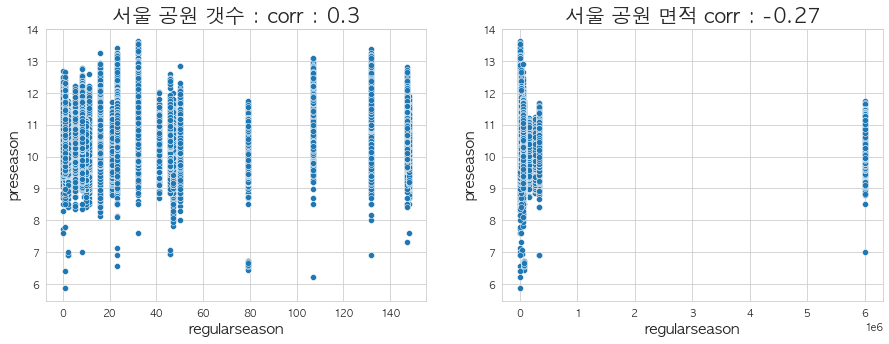

In [244]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
corr = train_seoul['park_number'].corr(train_seoul['log_price'])
sns.scatterplot(train_seoul['park_number'], train_seoul['log_price'])
plt.title("서울 공원 갯수 : corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

plt.subplot(1, 2, 2)
corr = train_seoul['park_area'].corr(train_seoul['log_price'])
sns.scatterplot(train_seoul['park_area'], train_seoul['log_price'])
plt.title("서울 공원 면적 corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

plt.show()

In [245]:
train_busan['park_area'] = train_busan["park_area"].replace(np.nan, 0)
test_busan['park_area'] = test_busan["park_area"].replace(np.nan, 0)

train_busan['park_number'] = train_busan["park_number"].replace(np.nan, 0)
test_busan['park_number'] = test_busan["park_number"].replace(np.nan, 0)
print(train_seoul['park_area'].unique())

[4.29593000e+04 2.15766512e+04 2.58716063e+04 5.51622565e+03
 1.32420938e+04 9.19881818e+02 2.66734955e+05 0.00000000e+00
 1.68354544e+05 3.37808500e+05 6.01353100e+06 7.56669190e+04
 1.60774818e+04 2.70423960e+04 3.35300000e+03 2.24361561e+04
 5.75644468e+04 8.85691000e+03 5.28987500e+03 4.63521065e+04
 1.07476190e+03 1.54530617e+04 2.50202850e+04 6.65804913e+04]


/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


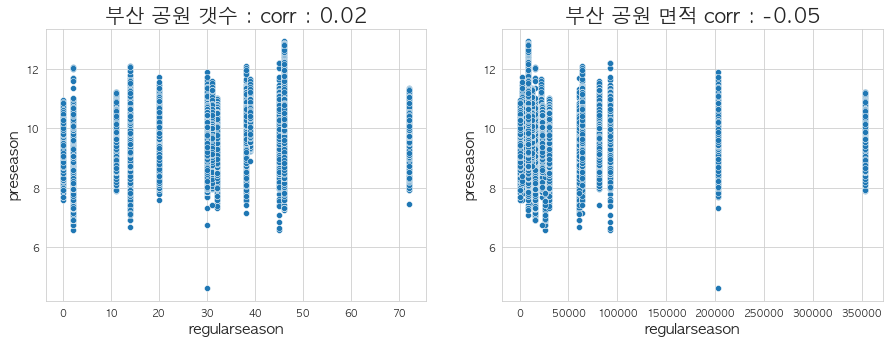

In [246]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
corr = train_busan['park_number'].corr(train_busan['log_price'])
sns.scatterplot(train_busan['park_number'], train_busan['log_price'])
plt.title("부산 공원 갯수 : corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

plt.subplot(1, 2, 2)
corr = train_busan['park_area'].corr(train_busan['log_price'])
sns.scatterplot(train_busan['park_area'], train_busan['log_price'])
plt.title("부산 공원 면적 corr : " + str(np.round(corr, 2)), fontsize = 20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

plt.show()

# 도출 결과 2-8-2
## 공원에 갯수는 상관계수가 유의미한지표로 나오지만, 공원에 면접은 중요하지 않다.

# 2-9 공공 데이터 포털에서 소득분위
## 1.현재 데이터로만은 정확한 분석이 불가능하기에 해당 자치구에 소득 분위 데이터를 사용해 접목시킨다.

In [247]:
seoul_income = pd.read_excel("data/서울시 소득분위.xls")
busan_income = pd.read_excel("data/부산 소득분위.xlsx")

In [248]:
seoul_income = seoul_income.set_index("자치구(1)")
busan_income = busan_income.set_index('자치구')

In [249]:
seoul_income = np.log1p(seoul_income)
busan_income = np.log1p(busan_income)

In [250]:
seoul_income = seoul_income.sort_index()
busan_income = busan_income.sort_index()

/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_1117/1596178584.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


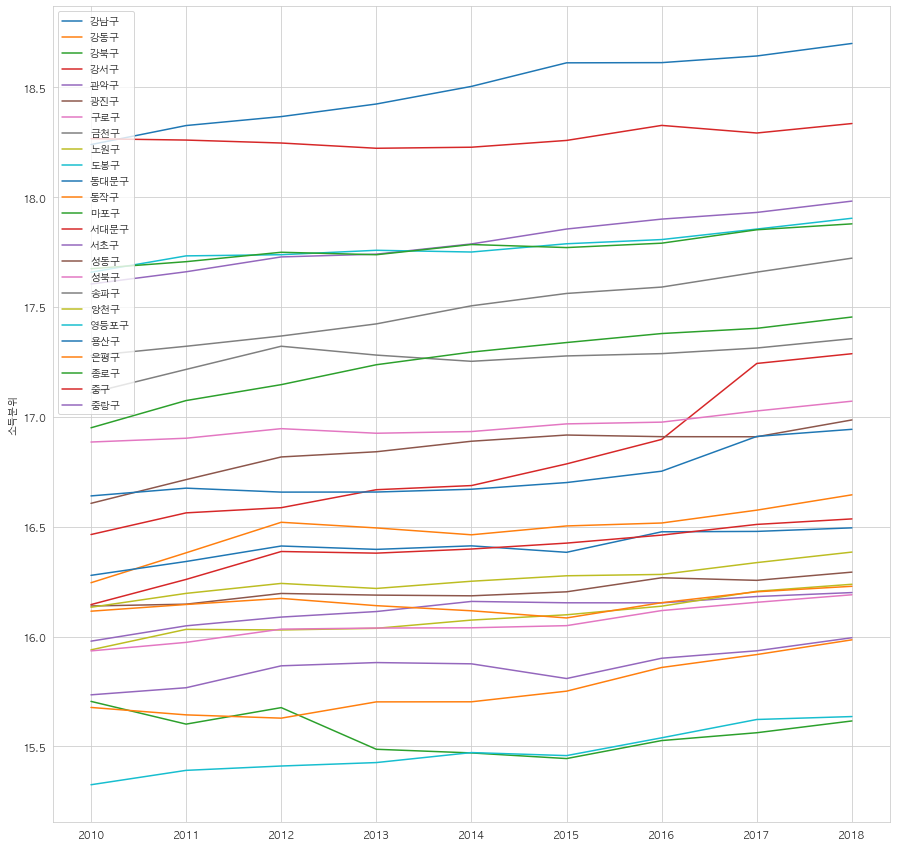

In [251]:
# plt.plot(seoul_income.loc['종로구'])


import seaborn as sns
for row in range(0,seoul_income.shape[0]):
    ax = sns.lineplot(data = seoul_income.iloc[row], label=seoul_income.iloc[row].name)
    # ax = sns.lineplot(data= data, x='year', y='log_price', label=name)

ax.figure.set_size_inches(15,15)
ax.legend(loc="upper left")
ax.set_ylabel("소득분위")
ax.figure.show()

/var/folders/v5/xvhr16_s7qd6nfvqvstsw2h40000gp/T/ipykernel_1117/1873900260.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


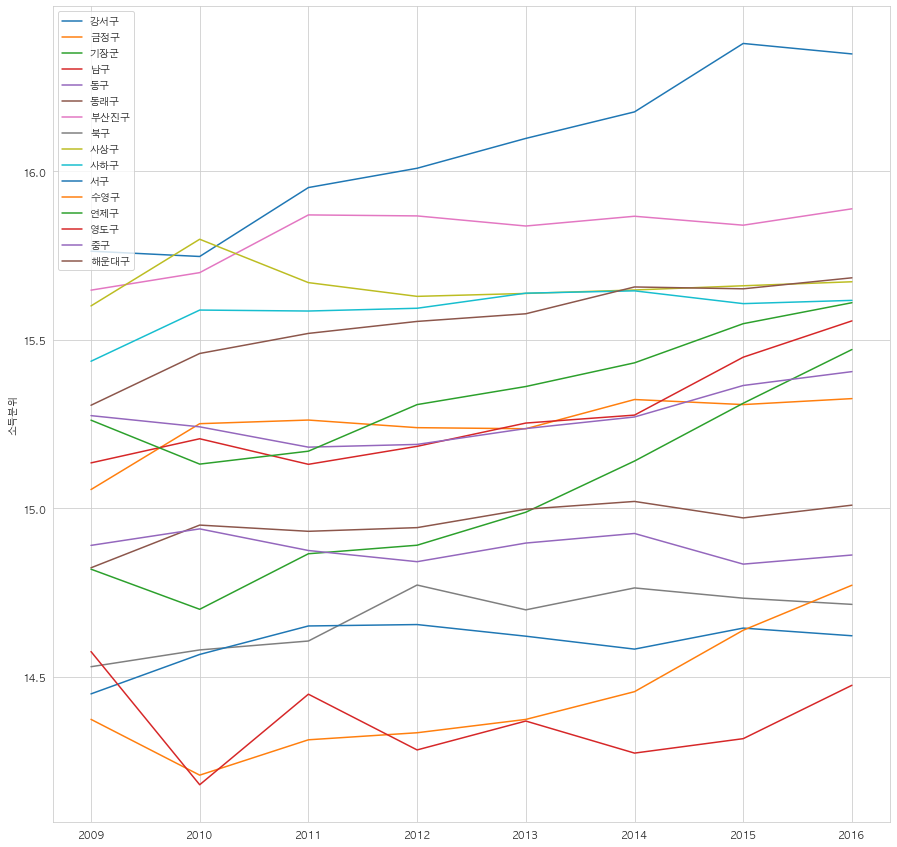

In [252]:
import seaborn as sns
for row in range(0,busan_income.shape[0]):
    ax = sns.lineplot(data = busan_income.iloc[row], label=busan_income.iloc[row].name)
    # ax = sns.lineplot(data= data, x='year', y='log_price', label=name)

ax.figure.set_size_inches(15,15)
ax.legend(loc="upper left")
ax.set_ylabel("소득분위")
ax.figure.show()

## 2-9-2 도출 결과
1. 소득 분위가 높을 수록 아파트 가격은 점점 올라간다.

In [253]:
avg_seoul_income=seoul_income.mean(axis=1)
avg_busan_income = busan_income.mean(axis=1)

In [254]:
avg_seoul_income

자치구(1)
강남구     18.492643
강동구     16.483032
강북구     15.565529
강서구     16.798511
관악구     16.120156
광진구     16.208773
구로구     16.959885
금천구     17.268855
노원구     16.088665
도봉구     15.475698
동대문구    16.408678
동작구     16.151795
마포구     17.253621
서대문구    16.389577
서초구     17.799349
성동구     16.843814
성북구     16.059576
송파구     17.492759
양천구     16.258353
영등포구    17.777453
용산구     16.734723
은평구     15.763311
종로구     17.772122
중구      18.271243
중랑구     15.863032
dtype: float64

In [255]:
avg_seoul_income = avg_seoul_income.reset_index()
avg_busan_income = avg_busan_income.reset_index()
avg_seoul_income.columns = ["gu", "소득분위"]
avg_busan_income.columns = ["gu", "소득분위"]

In [256]:
train_seoul=train_seoul.merge(avg_seoul_income, how= "left", on ="gu")
test_seoul = test_seoul.merge(avg_seoul_income, how= "left", on ="gu")

train_busan = train_busan.merge(avg_busan_income, how= "left", on ="gu")
test_busan = test_busan.merge(avg_busan_income, how= "left", on ="gu")

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'preseason')

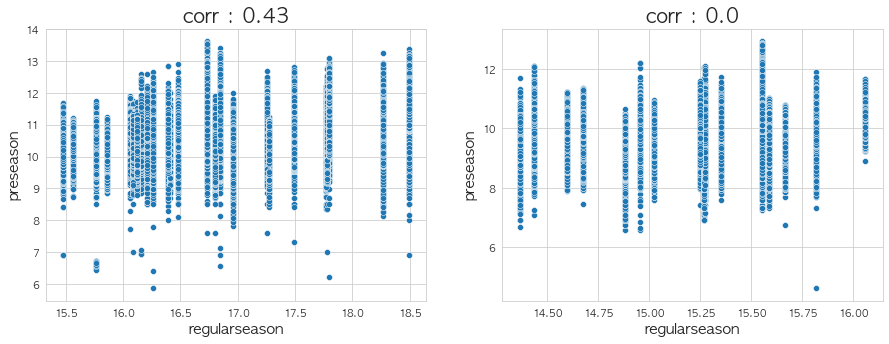

In [262]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
train_seoul
corr = train_seoul['소득분위'].corr(train_seoul['log_price'])
sns.scatterplot(train_seoul['소득분위'], train_seoul['log_price'])
plt.title("서울 corr : " + str(np.round(corr, 2)), fontsize=20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

plt.subplot(1,2,2)
corr = train_busan['소득분위'].corr(train_busan['log_price'])
sns.scatterplot(train_busan['소득분위'], train_busan['log_price'])
plt.title("부산 corr : " + str(np.round(corr, 2)), fontsize=20)
plt.xlabel('regularseason', fontsize=15)
plt.ylabel('preseason', fontsize=15)

# 도출 결과 2-9-3
1. 서울은 지역내에서 소득분위에 따라 아파트 가격에 영향을 많이 주지만
2. 부산은 지역마다 가격 분포가 일정하기 때문에 상관 계수는 거의 의미 없다.

# 2- 10 설립 년도에 따른 아파트 가격

1961년도부터 2017년도까지 설립된 아파트들의 데이터가 존재함.

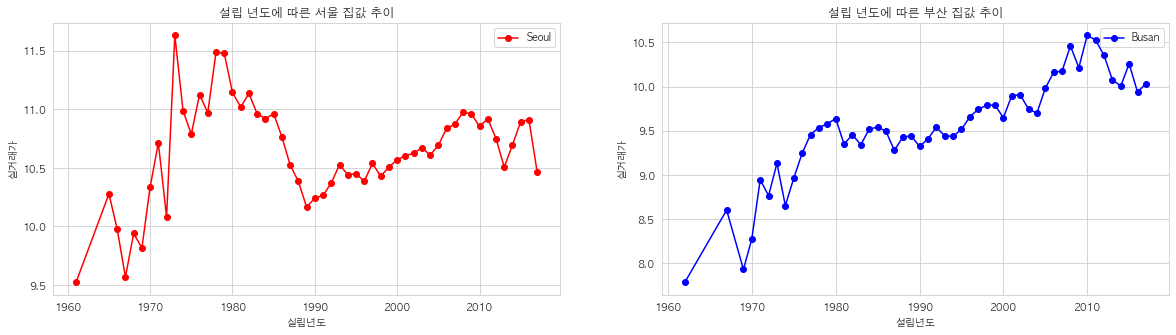

In [268]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
year_of_completion_seoul_mean = train_seoul.groupby('year_of_completion').mean()['log_price']
plt.plot(year_of_completion_seoul_mean, marker='o', color='r', label='Seoul')
plt.xlabel('실립년도')
plt.ylabel('실거래가')
plt.title('설립 년도에 따른 서울 집값 추이')
plt.legend()

plt.subplot(1,2,2)
year_of_completion_busan_mean = train_busan.groupby('year_of_completion').mean()['log_price']
plt.plot(year_of_completion_busan_mean, marker='o', color='b', label='Busan')
plt.xlabel('설립년도')
plt.ylabel('실거래가')
plt.title('설립 년도에 따른 부산 집값 추이')
plt.legend()
plt.show()

# 도출 결과 2-10
1. 서울에 경우 1970 년도에 지어진 건물들은 재건축을 하기에 가격이 폭등하는 사항
2. 부산은 재건축 보다는 신축건물들이 가격이 올라가고 있다.

# 2- 11 집 면접에 따른 가

In [ ]:
import plotly.express as px
plt.figure(figsize=(15, 5))

# plt.subplot(1,2,1)
size_seoul_mean = train_seoul.groupby('log_area').mean()['log_price']
# sns.scatterplot(data=train_seoul, x='exclusive_use_area', y='transaction_real_price', color='r')
fig = px.scatter(train_seoul, x='log_area', y='log_price')
fig.update_layout(width=800)

# plt.subplot(1,2,2)
# sns.scatterplot(data=train_busan, x='exclusive_use_area', y='transaction_real_price', color='b')


# 도출 결과 2 -11
1. 아파트 면적에 따라 가격도 상승하고 있다.

# 2- 12 아파트 층수에 대한 시각화

69
80


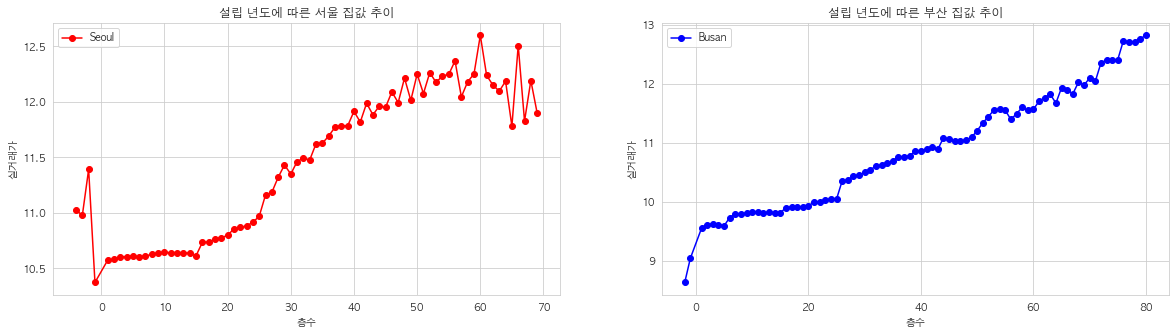

In [276]:
plt.figure(figsize=(20, 5))

print(train_seoul['floor'].max())
print(train_busan['floor'].max())

plt.subplot(1,2,1)
floor_seoul_mean = train_seoul.groupby('floor').mean()['log_price']
plt.plot(floor_seoul_mean, marker='o', color='r', label='Seoul')
plt.xlabel('층수')
plt.ylabel('실거래가')
plt.title('설립 년도에 따른 서울 집값 추이')
plt.legend()

plt.subplot(1,2,2)
floor_busan_mean = train_busan.groupby('floor').mean()['log_price']
plt.plot(floor_busan_mean, marker='o', color='b', label='Busan')
plt.xlabel('층수')
plt.ylabel('실거래가')
plt.title('설립 년도에 따른 부산 집값 추이')
plt.legend()
plt.show()

# 도출 결과  2- 12
1. 층수가 높을 수록 가격은 상승

# 중간 저장

In [284]:
train_seoul.to_csv("SaveData/train_seoul.csv", index=False)
train_busan.to_csv("SaveData/train_busan.csv", index=False)

test_seoul.to_csv('SaveData/test_seoul.csv', index=False)
test_busan.to_csv('SaveData/test_busan.csv', index=False)

In [24]:
train_seoul = pd.read_csv("SaveData/train_seoul.csv")
train_busan = pd.read_csv("SaveData/train_busan.csv")
test_seoul = pd.read_csv("SaveData/test_seoul.csv")
test_busan = pd.read_csv("SaveData/test_busan.csv")

# 2-13 모델 특성 선택하기

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\AppData\Roaming\Python\Pytho

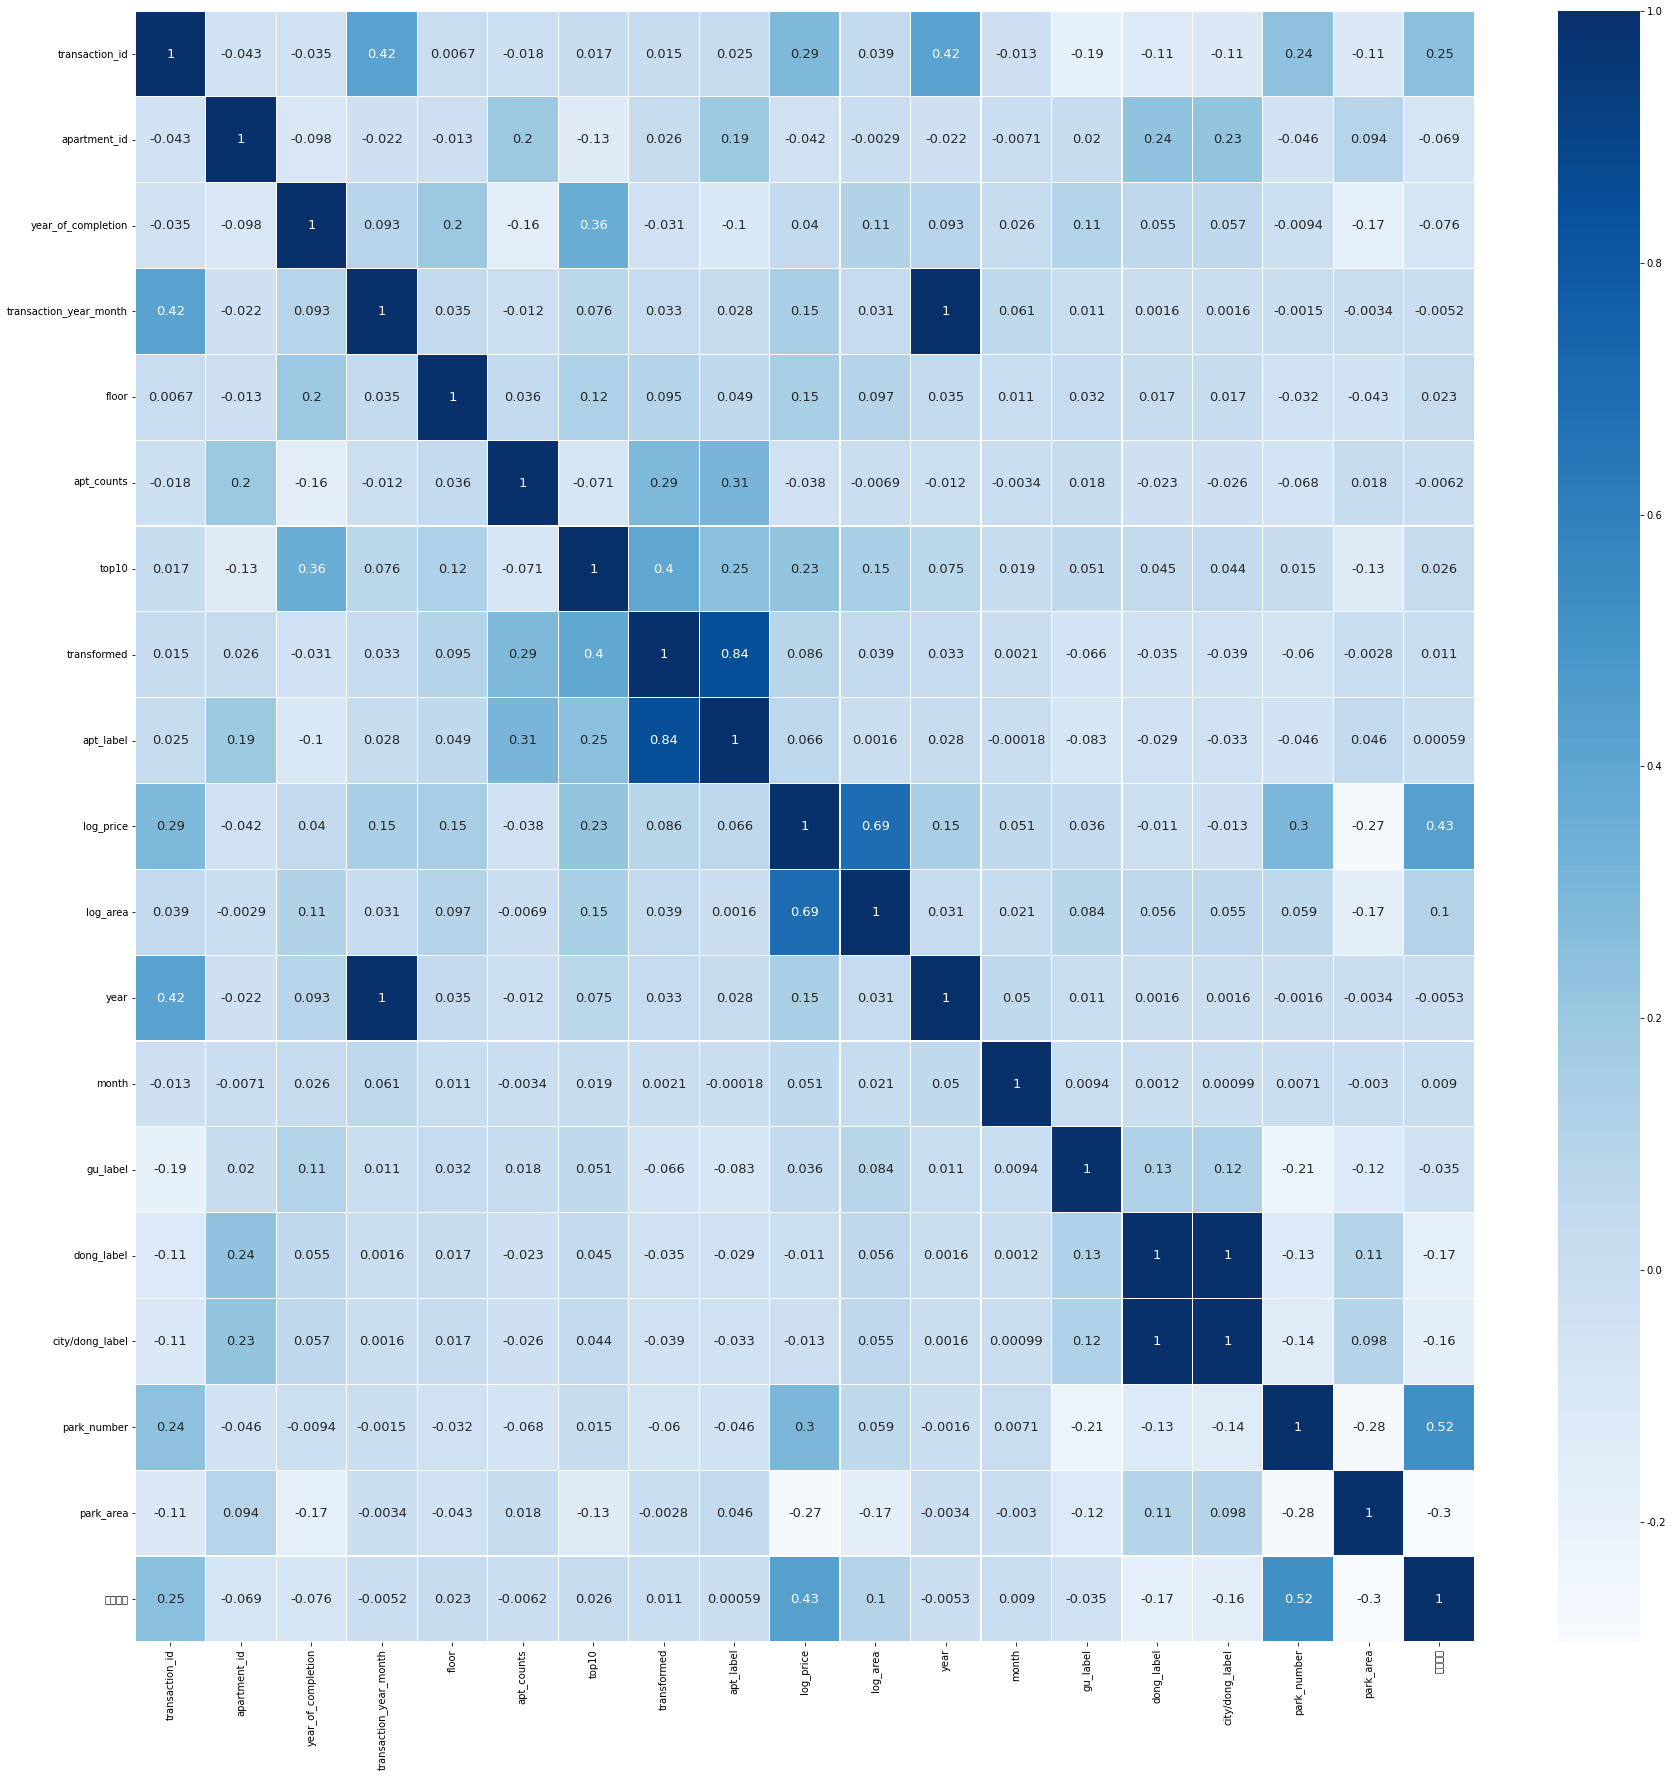

In [96]:
import seaborn as sns
plt.figure(figsize=(30,30))

sns.heatmap(train_seoul.corr(),linewidths=0.1, cmap='Blues', linecolor='white', annot=True,annot_kws={"fontsize":13})
plt.show()

# log_price 상관계수가 0보다 작은 컬럼 삭제하기

In [97]:
df_seoul = train_seoul.corr()
mask1 = df_seoul.loc['log_price'] < 0

df_busan = train_busan.corr()
mask2 = df_busan.loc['log_price'] < 0.1

In [98]:
df_seoul.loc[mask1, 'log_price'].index

Index(['apartment_id', 'apt_counts', 'dong_label', 'city/dong_label',
       'park_area'],
      dtype='object')

In [99]:
train_seoul_select = train_seoul.drop(list(df_seoul.loc[mask1, 'log_price'].index), axis=1)
test_seoul_select = test_seoul.drop(list(df_seoul.loc[mask1, 'log_price'].index), axis=1)

train_busan_select = train_busan.drop(list(df_busan.loc[mask2, 'log_price'].index), axis=1)
test_busan_select = test_busan.drop(list(df_busan.loc[mask2, 'log_price'].index), axis=1)


In [100]:
train_seoul_select  = train_seoul_select.drop(['transaction_id', 'transaction_date', 'addr_kr'] ,axis=1)
test_seoul_select = test_seoul_select.drop(['transaction_id', 'transaction_date', 'addr_kr'] ,axis=1)

train_busan_select  = train_busan_select.drop(['transaction_id', 'transaction_date', 'addr_kr'] ,axis=1)
test_busan_select = test_busan_select.drop(['transaction_id', 'transaction_date', 'addr_kr'] ,axis=1)

In [101]:
types1 = train_seoul_select.dtypes
types2 = train_busan_select.dtypes



def nameList(sr):
    nameList = []
    for i in sr.index:
        if sr[i] != "int64" and sr[i] != "float64":
            nameList.append(i)
    return  nameList


seoulList = nameList(types1)
busanList = nameList(types2)

In [102]:
train_seoul_select=train_seoul_select.drop(seoulList, axis=1)
test_seoul_select=test_seoul_select.drop(seoulList, axis=1)

train_busan_select = train_busan_select.drop(busanList, axis=1)
test_busan_select = test_busan_select.drop(busanList, axis=1)


In [103]:
train_seoul_select.to_csv("trainData/train_seoul.csv", index=False)
test_seoul_select.to_csv("trainData/test_seoul.csv", index=False)

train_busan_select.to_csv('trainData/train_busan.csv', index=False)
test_busan_select.to_csv('trainData/test_busan.csv', index=False)

# 3. 데이터 훈련 시작

In [1]:
import pandas as pd
train_seoul_select = pd.read_csv("trainData/train_seoul.csv")
train_busan_select = pd.read_csv("trainData/train_busan.csv")
test_seoul_select = pd.read_csv("trainData/test_seoul.csv")
test_busan_select = pd.read_csv("trainData/test_busan.csv")

In [2]:
train_seoul_x, train_seoul_y = train_seoul_select.drop('log_price', axis=1), train_seoul_select.log_price
train_busan_x, train_busan_y = train_busan_select.drop('log_price', axis=1), train_busan_select.log_price

# 모델 사용
1. LinearRegression
2. ElasticNet
3. Lasso
4. Ridge
5. DecisionTree
6. RandomTreeRegressor
7. xgb
8. lgb

In [3]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb
import lightgbm as lgb

In [4]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,min_samples_leaf=5, random_state=1,n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)

In [5]:
modelList = []
def myModel(model, train_x, train_y):
    scores = cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv=10)
    rmse_score = np.sqrt(-1 * scores)
    modelName =  model.__class__.__name__
    return {modelName : rmse_score}

In [128]:
modelList.append(myModel(reg, train_seoul_x, train_seoul_y))
modelList.append(myModel(ridge, train_seoul_x, train_seoul_y))
modelList.append(myModel(Enet, train_seoul_x, train_seoul_y))
modelList.append(myModel(DTree, train_seoul_x, train_seoul_y))
modelList.append(myModel(rf, train_seoul_x, train_seoul_y))
modelList.append(myModel(model_xgb, train_seoul_x, train_seoul_y))
modelList.append(myModel(model_lgb, train_seoul_x, train_seoul_y))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is 

In [129]:
df = pd.DataFrame()
for resultList in modelList:
    for k, v in resultList.items():
        df[k] = v;

In [130]:
df.to_csv("results_seoul.csv", index=False);

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


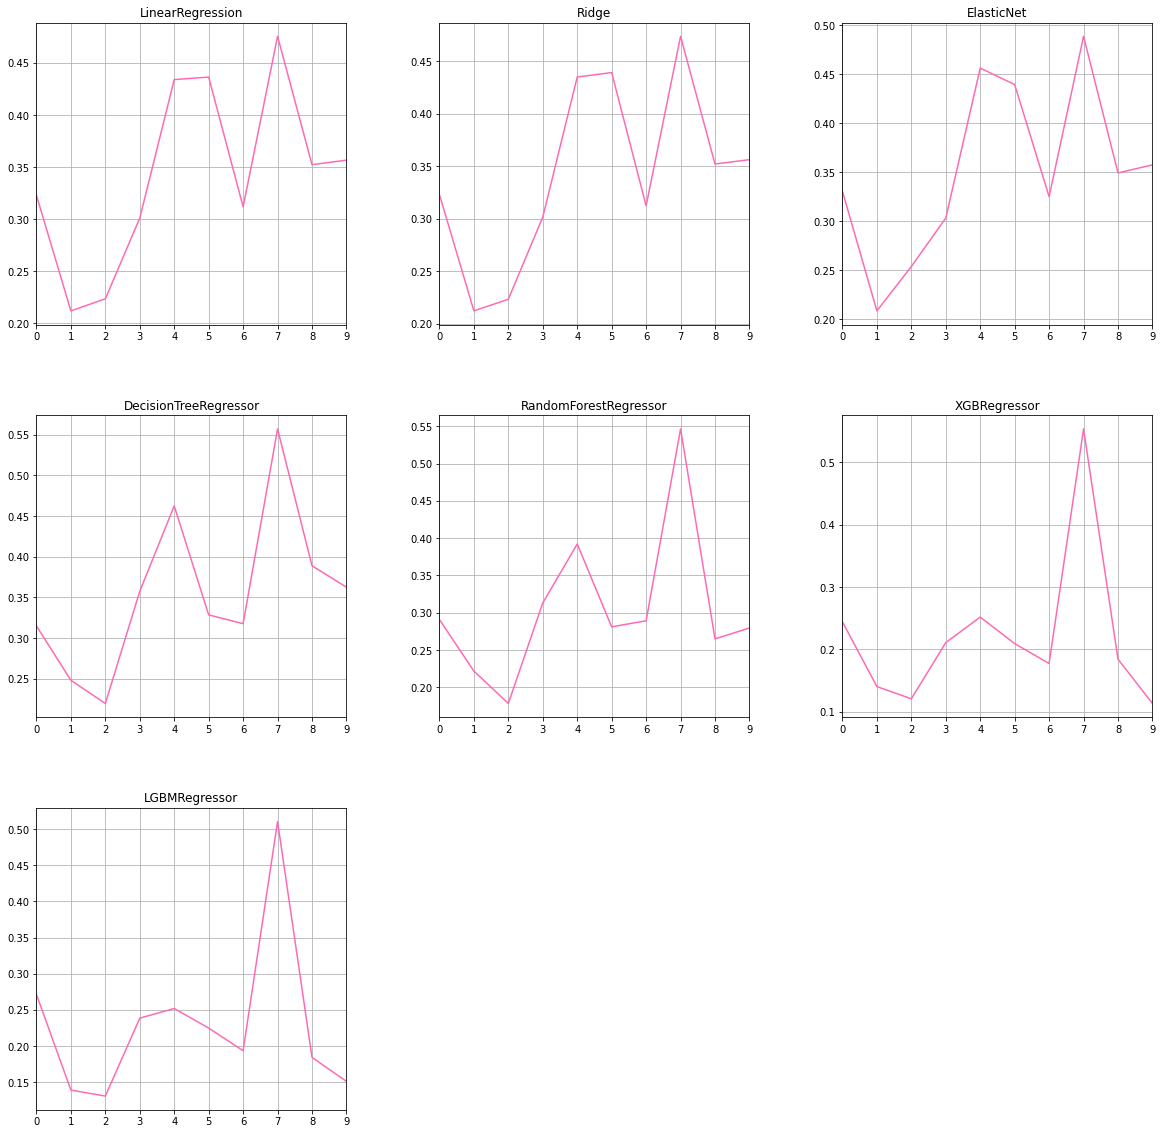

In [131]:
import matplotlib.pyplot as plt;
col = list(df.columns)
plt.figure(figsize=(20,20));

plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    plt.title(col[i])
    plt.xlim(0, 9)
    plt.plot(df.loc[:, col[i]], color="hotpink")
    plt.grid(True)

plt.show()

In [137]:
modelList = []
modelList.append(myModel(reg, train_busan_x, train_busan_y))
modelList.append(myModel(ridge, train_busan_x, train_busan_y))
modelList.append(myModel(Enet,train_busan_x, train_busan_y))
modelList.append(myModel(DTree,train_busan_x, train_busan_y))
modelList.append(myModel(rf, train_busan_x, train_busan_y))
modelList.append(myModel(model_xgb,train_busan_x, train_busan_y))
modelList.append(myModel(model_lgb, train_busan_x, train_busan_y))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.240e+04, tolerance: 1.469e+01
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.293e+04, tolerance: 1.535e+01
  model = cd_fast.enet_coordinate_descent(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

In [138]:
df = pd.DataFrame()
for resultList in modelList:
    for k, v in resultList.items():
        df[k] = v;

In [139]:
df.to_csv("results_busan.csv", index=False);

In [140]:
col = list(df.columns)

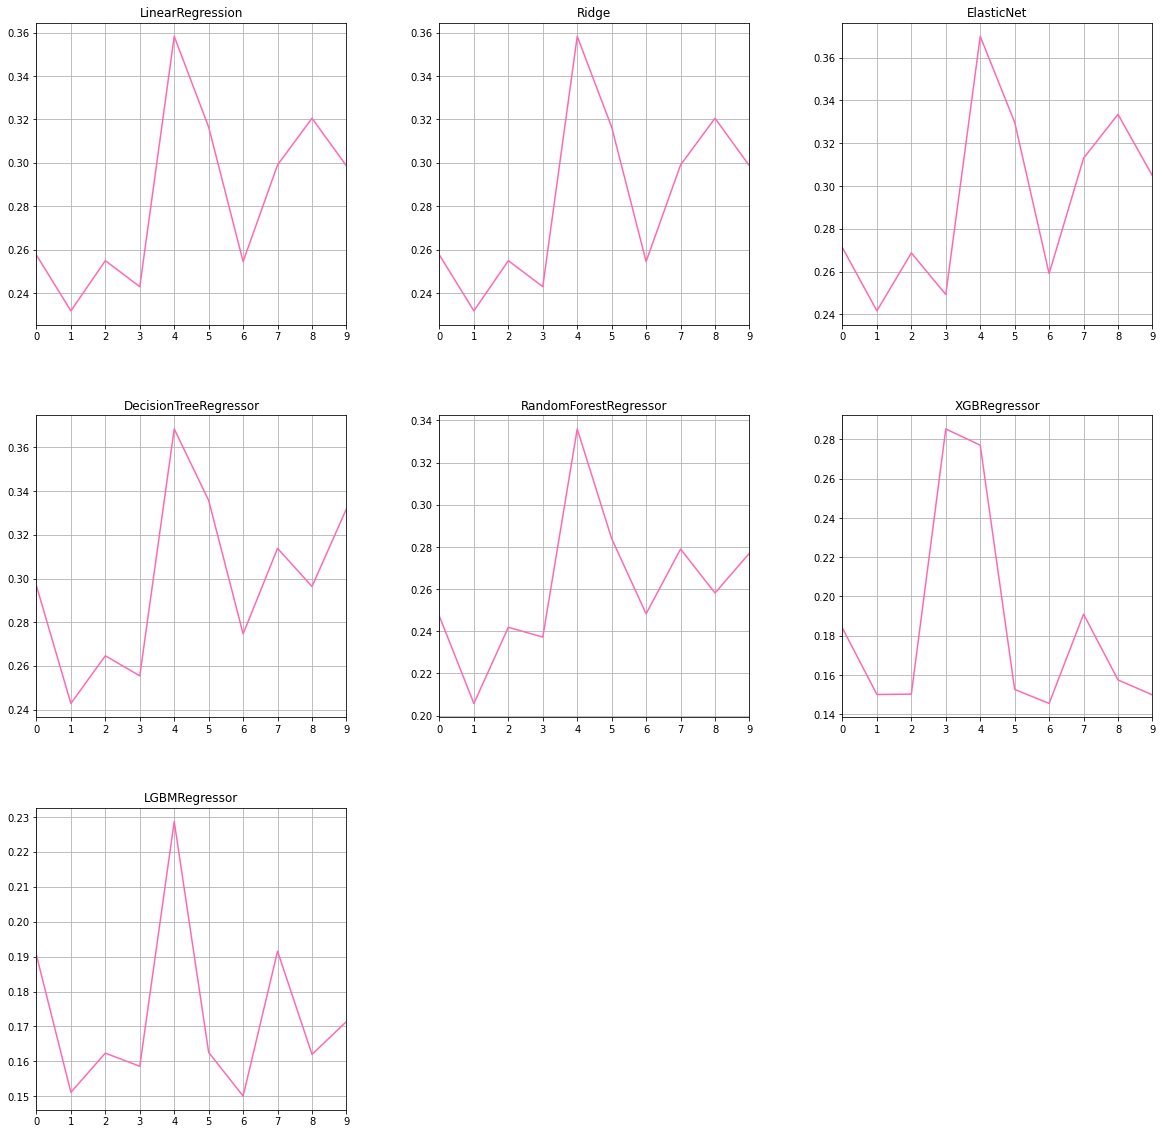

In [141]:
import matplotlib.pyplot as plt;

plt.figure(figsize=(20,20));

plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    plt.title(col[i])
    plt.xlim(0, 9)
    plt.plot(df.loc[:, col[i]], color="hotpink")
    plt.grid(True)

plt.show()

## 도출 결과 3-2
1. 서울은 Dree 기반들이 전체적으로 RMSE 값이 낮은 것을 볼 수 있다
2. 부산은 XGB기반이 낮다

# 3-3 모델 평균값 비교하기

In [142]:
seoul_mean = pd.read_csv("results_seoul.csv")
busan_mean = pd.read_csv("results_busan.csv")

In [144]:
seoul_mean = seoul_mean.mean().reset_index().rename(columns = {
    "index" : "model",
    0 : 'score'
})

busan_mean = busan_mean.mean().reset_index().rename(columns = {
    "index" : "model",
    0 : 'score'
})

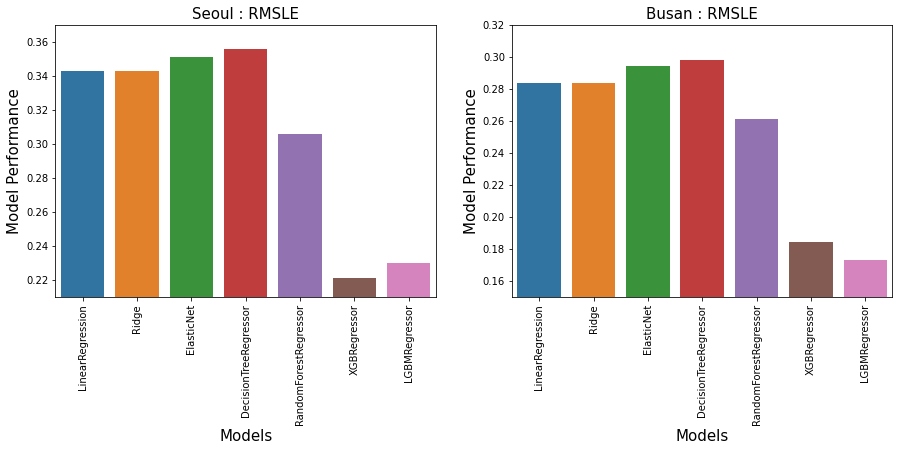

In [165]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.xticks(rotation='90')
sns.barplot(x=seoul_mean['model'], y=seoul_mean['score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.21, 0.37)
plt.title('Seoul : RMSLE', fontsize=15)


plt.subplot(1,2,2)
plt.xticks(rotation='90')
sns.barplot(x=busan_mean['model'], y=busan_mean['score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.15, 0.32)
plt.title('Busan : RMSLE', fontsize=15)
plt.show()

# 도출 결과 3-3
1. 서울은 XGB 모델을 사용해 grid search을 실행하고
2. 부산은 LGB 모델을 사용해 grid search을 사용한다.

In [163]:
busan_mean.describe()

score
count  7.000000
mean   0.253955
std    0.052874
min    0.172880
25%    0.222868
50%    0.283476
75%    0.288777
max    0.298039

# 4. 모델 최적화
- 시간적인

In [6]:
from sklearn.model_selection import train_test_split


def train_split(data_x, data_y):
    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
    return train_x, test_x, train_y, test_y


train_x, test_x, train_y, test_y= train_split(train_seoul_x, train_seoul_y)

## TPESampler
- 하이퍼파리머터 튜닝에 쓰고 있는 Automl 기법
- 빠르게 튜닝이 가능하다는 장점

# 4-1 서울
- 서울은 XGB부스팅을 사용해 n_trials을 30만큼 반복한다.

In [10]:
from optuna import Trial
from optuna.samplers import TPESampler
import optuna
from sklearn.metrics import mean_squared_error

sampler = TPESampler(seed=10)

def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def objective(trial: Trial, train_x, train_y, test_x, test_y):
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 3000),
        'max_depth' : trial.suggest_int('max_depth', 3, 15),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 300),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'nthread' : -1,
        'lambda' : trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'subsample' : trial.suggest_categorical('subsample', [0.5, 0.4, 1]),
        'random_state' : 42,
        'tree_method' : 'gpu_hist',
        'predictor' : 'gpu_predictor'
    }

    model = xgb.XGBRegressor(**param)
    xgb_model = model.fit(train_x, train_y, eval_set=[(test_x, test_y)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(test_y, xgb_model.predict(test_x))
    return rmse

In [11]:
study_XGB = optuna.create_study(direction='minimize', sampler=sampler)
study_XGB.optimize(lambda trial : objective(trial, train_x, train_y, test_x, test_y), n_trials=30)

[I 2022-12-10 18:43:20,701] A new study created in memory with name: no-name-cd4fa0a3-18f8-4cb7-a366-eea5bae3b6ac
C:\Users\user\AppData\Local\Temp/ipykernel_12388/1531141644.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
C:\Users\user\AppData\Local\Temp/ipykernel_12388/1531141644.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda' : trial.suggest_loguniform('lambda', 1e-3, 10.0),
[I 2022-12-10 18:43:30,853] Trial 0 finished with value: 4.9156206452623605 and parameters: {'n_estimators': 2337, 'max_depth': 3, 'min_child_weight': 191, 'learning_rate': 0.000311

In [13]:
print("Best Score:", study_XGB.best_value)
print("Best trial:", study_XGB.best_trial.params)

Best Score: 0.11074941871655392
Best trial: {'n_estimators': 2467, 'max_depth': 12, 'min_child_weight': 94, 'learning_rate': 0.008521160392134563, 'lambda': 0.05751105266687621, 'subsample': 1}


# 4-1-1 데이터 훈련한 결과 시각화
- plot_optimization_history 메소드
- 모든 시행에 대한 최적화 기록을 표기합니다.


In [15]:
optuna.visualization.plot_optimization_history(study_XGB)

# 4-1-2 데이터 훈련한 결과 시각화
- plot_parallel_coordinate 메소드
- 고차원 모수 관계를 표시


In [17]:
optuna.visualization.plot_parallel_coordinate(study_XGB)

# 4-1-3 데이터 훈련한 결과 시각화
- plot_parallel_coordinate 메소드
- 하이퍼 파라미터에 중요도를 표시합니다.


In [18]:
optuna.visualization.plot_param_importances(study_XGB)

# 4-1-4 모델을 옮겨주는 역할을 한다.

In [19]:
trial = study_XGB.best_trial
trial_params = trial.params

In [21]:
trial_params

{'n_estimators': 2467,
 'max_depth': 12,
 'min_child_weight': 94,
 'learning_rate': 0.008521160392134563,
 'lambda': 0.05751105266687621,
 'subsample': 1}

In [22]:
final_seoul_model_xgb = xgb.XGBRegressor(**trial_params)
final_seoul_model_xgb.fit(train_seoul_x, train_seoul_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', lambda=0.05751105266687621,
             learning_rate=0.008521160392134563, max_delta_step=0, max_depth=12,
             min_child_weight=94, missing=nan, monotone_constraints='()',
             n_estimators=2467, n_jobs=12, num_parallel_tree=1,
             predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.057511054, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
final_seoul_pred =final_seoul_model_xgb.predict(test_seoul_select)
final_seoul_pred

array([10.028586, 11.535238, 10.84768 , ..., 12.108935, 11.035384,
       10.537566], dtype=float32)

# 4-1-4 모델에 특성에 대한 중요도를 시각화한다

<BarContainer object of 11 artists>

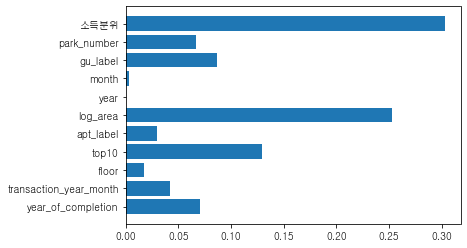

In [37]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import matplotlib.pyplot as plt
plt.barh(train_seoul_x.columns, final_seoul_model_xgb.feature_importances_)

# 도출 결과 4-1-4
- 소득분위가 가장 많은 영향을 미치고
- 아파트의 면적, TOP10 아파트가 중요하다는 것을 알 수 있다.

# 4-2 부산

In [59]:
train_x, test_x, train_y, test_y= train_split(train_busan_x, train_busan_y)
sampler = TPESampler(seed=42)


def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse


def objective(trial: Trial, train_x, train_y, test_x, test_y):
    dtrain = lgb.Dataset(train_x, label=train_y)
    dtest = lgb.Dataset(test_x, label=test_y)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse',
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
        'tree_method' : 'gpu_hist',
        'predictor' : 'gpu_predictor',
        'nthread' : -1
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(train_x, train_y, eval_set=[(test_x, test_y)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(test_y, lgb_model.predict(test_x))
    return rmse


study_LGM = optuna.create_study(direction='minimize', sampler=sampler)
study_LGM.optimize(lambda trial: objective(trial, train_x, train_y, test_x, test_y), n_trials=30)

[I 2022-12-10 20:24:28,753] A new study created in memory with name: no-name-ee60aea0-881e-4d34-bd9c-41d5939f6c7a
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

c:\users\user\appdata\local\progra

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:04,858] Trial 1 finished with value: 0.5929897812852223 and parameters: {'max_depth': 5, 'learning_rate': 2.2310108018679158e-08, 'n_estimators': 2612, 'min_child_samples': 62, 'subsample': 0.765297684068612}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is d

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:15,220] Trial 2 finished with value: 0.191268306743671 and parameters: {'max_depth': 3, 'learning_rate': 0.006598711072054081, 'n_estimators': 2514, 'min_child_samples': 25, 'subsample': 0.4725148048142631}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is dep

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:26,656] Trial 3 finished with value: 0.5925229729333295 and parameters: {'max_depth': 5, 'learning_rate': 6.690421166498788e-07, 'n_estimators': 1622, 'min_child_samples': 46, 'subsample': 0.5223381155442193}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is d

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:35,232] Trial 4 finished with value: 0.5929866276758652 and parameters: {'max_depth': 10, 'learning_rate': 6.870101665590006e-08, 'n_estimators': 947, 'min_child_samples': 40, 'subsample': 0.607503080954597}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is de

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:47,943] Trial 5 finished with value: 0.5929018594656652 and parameters: {'max_depth': 13, 'learning_rate': 1.577766363058244e-07, 'n_estimators': 1591, 'min_child_samples': 61, 'subsample': 0.4173923345744613}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:50,382] Trial 6 finished with value: 0.5930024397114213 and parameters: {'max_depth': 10, 'learning_rate': 1.0547383621352015e-07, 'n_estimators': 288, 'min_child_samples': 96, 'subsample': 0.9689996293810518}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:53,689] Trial 7 finished with value: 0.5928988790276841 and parameters: {'max_depth': 13, 'learning_rate': 6.724850206557239e-07, 'n_estimators': 383, 'min_child_samples': 70, 'subsample': 0.5987069208932017}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is d

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:25:55,381] Trial 8 finished with value: 0.5922158510945782 and parameters: {'max_depth': 4, 'learning_rate': 9.355380606452177e-06, 'n_estimators': 199, 'min_child_samples': 92, 'subsample': 0.5070361211081488}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is de

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:26:09,778] Trial 9 finished with value: 0.5924729674927587 and parameters: {'max_depth': 11, 'learning_rate': 7.417652034871823e-07, 'n_estimators': 1608, 'min_child_samples': 57, 'subsample': 0.47382827709841974}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:26:24,956] Trial 10 finished with value: 0.16840313330536896 and parameters: {'max_depth': 7, 'learning_rate': 0.003955232336089218, 'n_estimators': 2119, 'min_child_samples': 6, 'subsample': 0.405672369598035}. Best is trial 0 with value: 0.15868349409916366.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is de

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:26:40,329] Trial 11 finished with value: 0.1456864651451517 and parameters: {'max_depth': 7, 'learning_rate': 0.007953409633698581, 'n_estimators': 2167, 'min_child_samples': 13, 'subsample': 0.4013720109047739}. Best is trial 11 with value: 0.1456864651451517.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is d

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:26:56,751] Trial 12 finished with value: 0.33850027464076216 and parameters: {'max_depth': 7, 'learning_rate': 0.0004511388495675214, 'n_estimators': 2070, 'min_child_samples': 9, 'subsample': 0.4060696340155517}. Best is trial 11 with value: 0.1456864651451517.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:27:21,092] Trial 13 finished with value: 0.4455076458085863 and parameters: {'max_depth': 7, 'learning_rate': 0.0001378296140671229, 'n_estimators': 2991, 'min_child_samples': 80, 'subsample': 0.7228898200777369}. Best is trial 11 with value: 0.1456864651451517.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:27:39,868] Trial 14 finished with value: 0.30817260260754864 and parameters: {'max_depth': 8, 'learning_rate': 0.0005559231881814425, 'n_estimators': 2115, 'min_child_samples': 31, 'subsample': 0.5500437593750167}. Best is trial 11 with value: 0.1456864651451517.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:27:48,552] Trial 15 finished with value: 0.5773437109181399 and parameters: {'max_depth': 15, 'learning_rate': 3.213476103996379e-05, 'n_estimators': 1094, 'min_child_samples': 21, 'subsample': 0.4595849978287922}. Best is trial 11 with value: 0.1456864651451517.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:28:06,892] Trial 16 finished with value: 0.20404280657035623 and parameters: {'max_depth': 6, 'learning_rate': 0.001601446145845733, 'n_estimators': 2469, 'min_child_samples': 76, 'subsample': 0.7368481236544839}. Best is trial 11 with value: 0.1456864651451517.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:28:26,365] Trial 17 finished with value: 0.13635461089346512 and parameters: {'max_depth': 9, 'learning_rate': 0.008316150164448028, 'n_estimators': 2900, 'min_child_samples': 43, 'subsample': 0.45027291545271725}. Best is trial 17 with value: 0.13635461089346512.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument i

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:28:53,315] Trial 18 finished with value: 0.5321341603225678 and parameters: {'max_depth': 9, 'learning_rate': 4.954868118986831e-05, 'n_estimators': 2945, 'min_child_samples': 41, 'subsample': 0.6679923989057894}. Best is trial 17 with value: 0.13635461089346512.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:29:16,010] Trial 19 finished with value: 0.22661250641691028 and parameters: {'max_depth': 12, 'learning_rate': 0.001021046080653488, 'n_estimators': 2595, 'min_child_samples': 16, 'subsample': 0.8437581760674224}. Best is trial 17 with value: 0.13635461089346512.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument i

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:29:32,141] Trial 20 finished with value: 0.5878705852276565 and parameters: {'max_depth': 9, 'learning_rate': 6.095354604255733e-06, 'n_estimators': 1866, 'min_child_samples': 34, 'subsample': 0.43636853690846394}. Best is trial 17 with value: 0.13635461089346512.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument i

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:29:51,958] Trial 21 finished with value: 0.13897549109948676 and parameters: {'max_depth': 8, 'learning_rate': 0.009089386482629344, 'n_estimators': 2418, 'min_child_samples': 50, 'subsample': 0.4451927927234888}. Best is trial 17 with value: 0.13635461089346512.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:30:10,120] Trial 22 finished with value: 0.13765288602596507 and parameters: {'max_depth': 9, 'learning_rate': 0.008376293745312098, 'n_estimators': 2738, 'min_child_samples': 49, 'subsample': 0.5493834891731214}. Best is trial 17 with value: 0.13635461089346512.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:30:33,425] Trial 23 finished with value: 0.18733391842738856 and parameters: {'max_depth': 10, 'learning_rate': 0.0018277027540175286, 'n_estimators': 2743, 'min_child_samples': 51, 'subsample': 0.5586999886950182}. Best is trial 17 with value: 0.13635461089346512.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:30:55,888] Trial 24 finished with value: 0.13369760964087107 and parameters: {'max_depth': 8, 'learning_rate': 0.00964580510961756, 'n_estimators': 2798, 'min_child_samples': 47, 'subsample': 0.5055987722129028}. Best is trial 24 with value: 0.13369760964087107.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:31:28,862] Trial 25 finished with value: 0.4361595549185639 and parameters: {'max_depth': 11, 'learning_rate': 0.0001594938274067937, 'n_estimators': 2800, 'min_child_samples': 39, 'subsample': 0.5073839601678833}. Best is trial 24 with value: 0.13369760964087107.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument i

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:31:58,576] Trial 26 finished with value: 0.17309491617394954 and parameters: {'max_depth': 8, 'learning_rate': 0.002540853553280849, 'n_estimators': 2758, 'min_child_samples': 32, 'subsample': 0.559247714637479}. Best is trial 24 with value: 0.13369760964087107.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:32:12,379] Trial 27 finished with value: 0.4394596661651428 and parameters: {'max_depth': 9, 'learning_rate': 0.00039122517102993, 'n_estimators': 1110, 'min_child_samples': 46, 'subsample': 0.5026614605278726}. Best is trial 24 with value: 0.13369760964087107.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is d

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:32:45,848] Trial 28 finished with value: 0.42007746413135194 and parameters: {'max_depth': 11, 'learning_rate': 0.00017031487685597536, 'n_estimators': 2990, 'min_child_samples': 54, 'subsample': 0.643810350435093}. Best is trial 24 with value: 0.13369760964087107.
C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\user\AppData\Local\Temp/ipykernel_12388/3674339690.py:22: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning:

'early_stopping_rounds' argument 

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1


[I 2022-12-10 20:33:06,917] Trial 29 finished with value: 0.17127167100750237 and parameters: {'max_depth': 6, 'learning_rate': 0.0036483390721252346, 'n_estimators': 2348, 'min_child_samples': 61, 'subsample': 0.5899730399225397}. Best is trial 24 with value: 0.13369760964087107.


In [62]:
print("Best Score:", study_LGM.best_value)
print("Best trial:", study_LGM.best_trial.params)

Best Score: 0.13369760964087107
Best trial: {'max_depth': 8, 'learning_rate': 0.00964580510961756, 'n_estimators': 2798, 'min_child_samples': 47, 'subsample': 0.5055987722129028}


# 4-2-1 시각화 plot_optimization_history

In [68]:
optuna.visualization.plot_optimization_history(study_LGM)

# 4-2-2 시각화 plot_parallel_coordinate

In [69]:
optuna.visualization.plot_parallel_coordinate(study_LGM)

# 4-2-3 시각화 plot_param_importances

In [70]:
optuna.visualization.plot_param_importances(study_LGM)

# 4-2-4 모델 옮기기

In [71]:
trial = study_LGM.best_trial
trial_params = trial.params
trial_params

{'max_depth': 8,
 'learning_rate': 0.00964580510961756,
 'n_estimators': 2798,
 'min_child_samples': 47,
 'subsample': 0.5055987722129028}

In [72]:
final_busan_model_lgb = lgb.LGBMRegressor(**trial_params)
final_busan_model_lgb.fit(train_busan_x, train_busan_y)

LGBMRegressor(learning_rate=0.00964580510961756, max_depth=8,
              min_child_samples=47, n_estimators=2798,
              subsample=0.5055987722129028)

# 4-2-5 모델에 특성에 대한 중요도를 시각화한다

<BarContainer object of 9 artists>

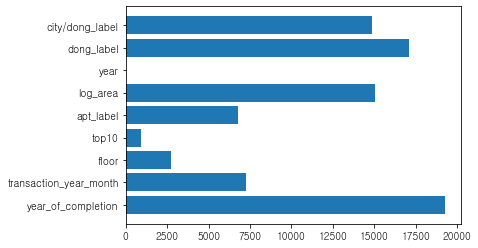

In [73]:
final_busan_pred = final_busan_model_lgb.predict(test_busan_select)

import matplotlib.pyplot as plt

plt.barh(train_busan_x.columns, final_busan_model_lgb.feature_importances_)

# 제출

In [44]:
train_id = test_seoul[['transaction_id']]
final_seoul_pred = np.expm1(final_seoul_pred)


In [50]:
df = pd.DataFrame(final_seoul_pred, columns=["transaction_real_price"])
df["transaction_id"] = train_id

In [79]:
df_seoul = df

In [77]:
train_id = test_busan[['transaction_id']]
final_busan_pred = np.expm1(final_busan_pred)
df_busan = pd.DataFrame(final_busan_pred, columns=["transaction_real_price"])
df_busan["transaction_id"] = train_id

In [85]:
df_merge = pd.concat([df_seoul, df_busan], axis=0)

In [87]:
df_merge = df_merge.sort_values("transaction_id")

In [91]:
df_merge = df_merge[['transaction_id', 'transaction_real_price']]

In [92]:
df_merge.to_csv('submission.csv', index=False)